In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
%matplotlib inline
import numpy as np
import dataframe_image as dfig

df = pd.concat(pd.read_excel("../Dados/202001.xlsx", sheet_name=None), ignore_index=True)
#df.set_index('Data',inplace=True)
df = df.dropna(axis="columns")
df = df.rename(columns={"Tipo   Lançamento  Nr. Ordem\nAbast." : "Tipo", "Tipo" : "Tipo Nota Fiscal","Unnamed: 4" : "Lançamento", "Exerc. Empenho" : "Exerc.", "Unnamed: 8" : "Empenho", "Unnamed: 10" : "Nr Litros", "Valor        Numero Abast." : "Valor Abast.", "Unnamed: 15" : "Valor Ajustado", "Exerc..1" : "Exerc."})
df = df.drop(["Lançamento", "Exerc.", "Empenho", "Tipo Nota Fiscal", "Serie", "Valor Ajustado", "EQAL", "Liquidação"], axis = 1)
df["Produto"] = df["Produto"].replace("ÁLCOOL COMBUSTÍVEL (ETANOL)", "ETANOL")
df["Produto"] = df["Produto"].replace("ÓLEO DIESEL S-10", "DIESEL")
df["Produto"] = df["Produto"].replace("GASOLINA COMUM", "GASOLINA")
df['Valor Abast.'] = df['Valor Abast.'].str.replace(" ","")
df["Valor Abast."] = df["Valor Abast."].str.replace(",", ".")
df["Valor Abast."] = pd.to_numeric(df["Valor Abast."], errors="ignore")
df["Valor Abast."] = df["Valor Abast."].astype(float)
df["Valor Abast."] = df["Valor Abast."].round(2)
df['Data'] = df['Data'].dt.strftime('%d/%m/%Y')
df

,Data,Nr Frota,Placa,Tipo,Produto,Nr Litros,Valor Abast.
0,02/01/2020,87017,EQU-8717,Consum,GASOLINA,45.000,202.06
1,02/01/2020,31093,AZL-3509,Abast,DIESEL,193.510,752.76
2,02/01/2020,79466,BCD-6527,Abast,ETANOL,46.040,151.48
3,02/01/2020,79473,AJU-6529,Abast,DIESEL,48.041,186.89
4,02/01/2020,79472,BCG-4255,Abast,DIESEL,32.799,127.60
...,...,...,...,...,...,...,...
262,31/01/2020,79467,BCD-6528,Abast,ETANOL,35.240,115.95
263,31/01/2020,79466,BCD-6527,Abast,ETANOL,31.331,103.09
264,31/01/2020,79463,BCD-6524,Abast,ETANOL,47.249,155.46
265,31/01/2020,79468,BCD-6529,Abast,ETANOL,47.869,157.50


In [2]:
dh = df
df = pd.concat(pd.read_excel("../Dados/202002.xlsx", sheet_name=None), ignore_index=True)
df = df.dropna(axis="columns")
df = df.rename(columns={"Tipo   Lançamento  Nr. Ordem\nAbast." : "Tipo2", "Unnamed: 10" : "Nr Litros", "Unnamed: 4" : "Lançamento", "Valor        Numero Abast." : "Valor Abast.", "Unnamed: 8" : "Lançamento"})
df = df.drop(["Lançamento", "Unnamed: 15", "Serie", 'EQAL', 'Exerc.', 'Exerc..1', 'Liquidação', 'Tipo'], axis = 1)
df = df.rename(columns={"Tipo2" : "Tipo"})
df["Produto"] = df["Produto"].replace("ÁLCOOL COMBUSTÍVEL (ETANOL)", "ETANOL")
df["Produto"] = df["Produto"].replace("ÓLEO DIESEL S-10", "DIESEL")
df["Produto"] = df["Produto"].replace("GASOLINA COMUM", "GASOLINA")
df["Valor Abast."] = df["Valor Abast."].astype(str)
df["Valor Abast."] = df["Valor Abast."].str.replace(",", ".")
df['Valor Abast.'] = df['Valor Abast.'].str.replace(" ","")
df["Valor Abast."] = pd.to_numeric(df["Valor Abast."], errors="ignore")
df["Valor Abast."] = df["Valor Abast."].astype(float)
df["Valor Abast."] = df["Valor Abast."].round(2)
df['Data'] = df['Data'].dt.strftime('%d/%m/%Y')
df = pd.concat([df, dh], ignore_index=True)
df

,Data,Nr Frota,Placa,Tipo,Produto,Nr Litros,Valor Abast.
0,03/02/2020,87012,EQU-8712,Consum,GASOLINA,20.000,89.81
1,03/02/2020,31093,AZL-3509,Abast,DIESEL,181.760,688.88
2,03/02/2020,79439,ATJ-8583,Abast,DIESEL,72.681,275.47
3,03/02/2020,79413,AHQ-1425,Abast,GASOLINA,39.620,177.90
4,03/02/2020,79452,BCC-4699,Abast,ETANOL,43.340,142.60
...,...,...,...,...,...,...,...
517,31/01/2020,79467,BCD-6528,Abast,ETANOL,35.240,115.95
518,31/01/2020,79466,BCD-6527,Abast,ETANOL,31.331,103.09
519,31/01/2020,79463,BCD-6524,Abast,ETANOL,47.249,155.46
520,31/01/2020,79468,BCD-6529,Abast,ETANOL,47.869,157.50


In [3]:
dh = df
df = pd.concat(pd.read_excel("../Dados/202003.xlsx", sheet_name=None), ignore_index=True)
df['Unnamed: 10'] = df['Unnamed: 10'].fillna(df['Nr Litros'])
df = df.rename(columns={"Tipo   Lançamento  Nr. Ordem\nAbast." : "Tipo2", "Unnamed: 4" : "Lançamento", 'Unnamed: 10' : 'Nr Litros', "Valor        Numero Abast." : "Valor Abast.", "Unnamed: 8" : "Lançamento"})
df['Tipo2'] = df['Tipo2'].fillna(df['Tipo'])
df = df.dropna(axis="columns")
df = df.drop(['EQAL', 'Exerc.', 'Exerc..1', 'Liquidação'], axis = 1)
df = df.rename(columns={"Tipo2" : "Tipo"})
df["Produto"] = df["Produto"].replace("ÁLCOOL COMBUSTÍVEL (ETANOL)", "ETANOL")
df["Produto"] = df["Produto"].replace("ÓLEO DIESEL S-10", "DIESEL")
df["Produto"] = df["Produto"].replace("GASOLINA COMUM", "GASOLINA")
df["Valor Abast."] = df["Valor Abast."].astype(str)
df["Valor Abast."] = df["Valor Abast."].str.replace(",", ".")
df['Valor Abast.'] = df['Valor Abast.'].str.replace(" ","")
df["Valor Abast."] = pd.to_numeric(df["Valor Abast."], errors="ignore")
df["Valor Abast."] = df["Valor Abast."].astype(float)
df["Valor Abast."] = df["Valor Abast."].round(2)
df['Data'] = df['Data'].dt.strftime('%d/%m/%Y')
df = pd.concat([df, dh], ignore_index=True)
df

,Data,Nr Frota,Placa,Tipo,Produto,Nr Litros,Valor Abast.
0,02/03/2020,79440,ATM-6450,Abast,GASOLINA,48.310,216.92
1,02/03/2020,31102,AZR-9543,Abast,DIESEL,172.680,637.20
2,02/03/2020,78012,AKF-2842,Abast,DIESEL,106.250,392.07
3,02/03/2020,79441,ATM-6449,Abast,GASOLINA,48.900,219.57
4,02/03/2020,79465,BCD-6526,Abast,GASOLINA,39.210,176.06
...,...,...,...,...,...,...,...
665,31/01/2020,79467,BCD-6528,Abast,ETANOL,35.240,115.95
666,31/01/2020,79466,BCD-6527,Abast,ETANOL,31.331,103.09
667,31/01/2020,79463,BCD-6524,Abast,ETANOL,47.249,155.46
668,31/01/2020,79468,BCD-6529,Abast,ETANOL,47.869,157.50


In [4]:
dh = df
df = pd.concat(pd.read_excel("../Dados/202004.xlsx", sheet_name=None), ignore_index=True)
df['Unnamed: 10'] = df['Unnamed: 10'].fillna(df['Nr Litros'])
df = df.rename(columns={"Tipo   Lançamento  Nr. Ordem\nAbast." : "Tipo2", "Unnamed: 4" : "Lançamento", 'Unnamed: 10' : 'Nr Litros', "Valor        Numero Abast." : "Valor Abast.", "Unnamed: 8" : "Lançamento"})
df['Tipo2'] = df['Tipo2'].fillna(df['Tipo'])
df = df.dropna(axis="columns")
#df = df.drop(['EQAL', 'Exerc.', 'Exerc..1', 'Liquidação'], axis = 1)
df = df.rename(columns={"Tipo2" : "Tipo"})
df["Produto"] = df["Produto"].replace("ÁLCOOL COMBUSTÍVEL (ETANOL)", "ETANOL")
df["Produto"] = df["Produto"].replace("ÓLEO DIESEL S-10", "DIESEL")
df["Produto"] = df["Produto"].replace("GASOLINA COMUM", "GASOLINA")
df["Valor Abast."] = df["Valor Abast."].astype(str)
df["Valor Abast."] = df["Valor Abast."].str.replace(",", ".")
df['Valor Abast.'] = df['Valor Abast.'].str.replace(" ","")
df["Valor Abast."] = pd.to_numeric(df["Valor Abast."], errors="ignore")
df["Valor Abast."] = df["Valor Abast."].astype(float)
df["Valor Abast."] = df["Valor Abast."].round(2)
df['Data'] = df['Data'].dt.strftime('%d/%m/%Y')
df = pd.concat([df, dh], ignore_index=True)
df

,Data,Nr Frota,Placa,Produto,Valor Abast.,Tipo,Nr Litros
0,01/04/2020,79412,AHI-8548,GASOLINA,160.63,Abast,37.440
1,01/04/2020,79466,BCD-6527,ETANOL,150.51,Abast,47.180
2,01/04/2020,79462,BCD-6523,ETANOL,147.42,Abast,46.210
3,01/04/2020,79465,BCD-6526,ETANOL,150.99,Abast,47.330
4,01/04/2020,79468,BCD-6529,ETANOL,141.52,Abast,44.360
...,...,...,...,...,...,...,...
941,31/01/2020,79467,BCD-6528,ETANOL,115.95,Abast,35.240
942,31/01/2020,79466,BCD-6527,ETANOL,103.09,Abast,31.331
943,31/01/2020,79463,BCD-6524,ETANOL,155.46,Abast,47.249
944,31/01/2020,79468,BCD-6529,ETANOL,157.50,Abast,47.869


In [5]:
dh = df
df = pd.concat(pd.read_excel("../Dados/202005.xlsx", sheet_name=None), ignore_index=True)
df = df.rename(columns={"Tipo   Lançamento  Nr. Ordem\nAbast." : "Tipo2", "Unnamed: 4" : "Lançamento", 'Unnamed: 10' : 'Nr Litros', "Valor        Numero Abast." : "Valor Abast.", "Unnamed: 8" : "Lançamento"})
df = df.dropna(axis="columns")
df = df.drop(['EQAL', 'Exerc.', 'Exerc..1', 'Liquidação', 'Tipo.1', 'Serie', 'Valor Ajustado', 'Nr.  Lcto Fitcard', 'Lançamento  Nr. Ordem\nAbast.'], axis = 1)
df = df.rename(columns={"Tipo2" : "Tipo"})
df["Produto"] = df["Produto"].replace("ÁLCOOL COMBUSTÍVEL (ETANOL)", "ETANOL")
df["Produto"] = df["Produto"].replace("ÓLEO DIESEL S-10", "DIESEL")
df["Produto"] = df["Produto"].replace("GASOLINA COMUM", "GASOLINA")
df["Valor Abast."] = df["Valor Abast."].astype(str)
df["Valor Abast."] = df["Valor Abast."].str.replace(",", ".")
df['Valor Abast.'] = df['Valor Abast.'].str.replace(" ","")
df["Valor Abast."] = pd.to_numeric(df["Valor Abast."], errors="ignore")
df["Valor Abast."] = df["Valor Abast."].astype(float)
df["Valor Abast."] = df["Valor Abast."].round(2)
df['Data'] = df['Data'].dt.strftime('%d/%m/%Y')
df = pd.concat([df, dh], ignore_index=True)
df

,Data,Nr Frota,Placa,Tipo,Produto,Nr Litros,Valor Abast.
0,01/05/2020,79464,BCD-6525,Abast,ETANOL,39.300,101.80
1,02/05/2020,79457,BCC-4713,Abast,ETANOL,33.640,83.77
2,04/05/2020,79466,BCD-6527,Abast,ETANOL,43.082,111.59
3,04/05/2020,79474,EQU-4283,Abast,DIESEL,250.000,747.51
4,04/05/2020,79444,ATL-9834,Abast,ETANOL,50.690,126.23
...,...,...,...,...,...,...,...
1146,31/01/2020,79467,BCD-6528,Abast,ETANOL,35.240,115.95
1147,31/01/2020,79466,BCD-6527,Abast,ETANOL,31.331,103.09
1148,31/01/2020,79463,BCD-6524,Abast,ETANOL,47.249,155.46
1149,31/01/2020,79468,BCD-6529,Abast,ETANOL,47.869,157.50


In [6]:
dh = df
df = pd.concat(pd.read_excel("../Dados/202006.xlsx", sheet_name=None), ignore_index=True)
df = df.rename(columns={"Tipo   Lançamento  Nr. Ordem\nAbast." : "Tipo2", "Unnamed: 4" : "Lançamento", 'Unnamed: 10' : 'Nr Litros', "Valor        Numero Abast." : "Valor Abast.", "Unnamed: 8" : "Lançamento"})
df = df.dropna(axis="columns")
df = df.drop(['EQAL', 'Exerc.', 'Exerc..1', 'Liquidação', 'Tipo.1', 'Serie', 'Valor Ajustado', 'Nr.  Lcto Fitcard', 'Lançamento  Nr. Ordem\nAbast.'], axis = 1)
df = df.rename(columns={"Tipo2" : "Tipo"})
df["Produto"] = df["Produto"].replace("ÁLCOOL COMBUSTÍVEL (ETANOL)", "ETANOL")
df["Produto"] = df["Produto"].replace("ÓLEO DIESEL S-10", "DIESEL")
df["Produto"] = df["Produto"].replace("GASOLINA COMUM", "GASOLINA")
df["Valor Abast."] = df["Valor Abast."].astype(str)
df["Valor Abast."] = df["Valor Abast."].str.replace(",", ".")
df['Valor Abast.'] = df['Valor Abast.'].str.replace(" ","")
df["Valor Abast."] = pd.to_numeric(df["Valor Abast."], errors="ignore")
df["Valor Abast."] = df["Valor Abast."].astype(float)
df["Valor Abast."] = df["Valor Abast."].round(2)
df['Data'] = df['Data'].dt.strftime('%d/%m/%Y')
df = pd.concat([df, dh], ignore_index=True)
df

,Data,Nr Frota,Placa,Tipo,Produto,Nr Litros,Valor Abast.
0,01/06/2020,79449,AYE-7591,Abast,ETANOL,30.850,73.74
1,01/06/2020,79412,AHI-8548,Abast,GASOLINA,39.540,141.96
2,01/06/2020,79453,BCC-4701,Abast,ETANOL,44.870,107.27
3,01/06/2020,79461,BCD-6871,Abast,ETANOL,46.080,110.14
4,01/06/2020,79446,ATL-9841,Abast,ETANOL,47.280,113.01
...,...,...,...,...,...,...,...
1347,31/01/2020,79467,BCD-6528,Abast,ETANOL,35.240,115.95
1348,31/01/2020,79466,BCD-6527,Abast,ETANOL,31.331,103.09
1349,31/01/2020,79463,BCD-6524,Abast,ETANOL,47.249,155.46
1350,31/01/2020,79468,BCD-6529,Abast,ETANOL,47.869,157.50


In [7]:
dh = df
df = pd.concat(pd.read_excel("../Dados/202007.xlsx", sheet_name=None), ignore_index=True)
df = df.rename(columns={"Tipo   Lançamento  Nr. Ordem\nAbast." : "Tipo2", "Unnamed: 4" : "Lançamento", 'Unnamed: 10' : 'Nr Litros', "Valor        Numero Abast." : "Valor Abast.", "Unnamed: 8" : "Lançamento"})
df = df.dropna(axis="columns")
df = df.drop(['EQAL', 'Exerc.', 'Exerc..1', 'Liquidação', 'Tipo.1', 'Serie', 'Valor Ajustado', 'Nr.  Lcto Fitcard', 'Lançamento  Nr. Ordem\nAbast.'], axis = 1)
df = df.rename(columns={"Tipo2" : "Tipo"})
df["Produto"] = df["Produto"].replace("ÁLCOOL COMBUSTÍVEL (ETANOL)", "ETANOL")
df["Produto"] = df["Produto"].replace("ÓLEO DIESEL S-10", "DIESEL")
df["Produto"] = df["Produto"].replace("GASOLINA COMUM", "GASOLINA")
df["Valor Abast."] = df["Valor Abast."].astype(str)
df["Valor Abast."] = df["Valor Abast."].str.replace(",", ".")
df['Valor Abast.'] = df['Valor Abast.'].str.replace(" ","")
df["Valor Abast."] = pd.to_numeric(df["Valor Abast."], errors="ignore")
df["Valor Abast."] = df["Valor Abast."].astype(float)
df["Valor Abast."] = df["Valor Abast."].round(2)
df['Data'] = df['Data'].dt.strftime('%d/%m/%Y')
df = pd.concat([df, dh], ignore_index=True)
df

,Data,Nr Frota,Placa,Tipo,Produto,Nr Litros,Valor Abast.
0,01/07/2020,79435,ASZ-6991,Abast,GASOLINA,9.000,37.90
1,01/07/2020,79438,ASZ-7061,Abast,GASOLINA,8.935,35.66
2,01/07/2020,79506,AHR-1214,Abast,GASOLINA,37.960,155.27
3,01/07/2020,77118,AAW-6736,Abast,GASOLINA,31.151,124.30
4,01/07/2020,79455,BCC-4703,Abast,ETANOL,48.120,134.26
...,...,...,...,...,...,...,...
1585,31/01/2020,79467,BCD-6528,Abast,ETANOL,35.240,115.95
1586,31/01/2020,79466,BCD-6527,Abast,ETANOL,31.331,103.09
1587,31/01/2020,79463,BCD-6524,Abast,ETANOL,47.249,155.46
1588,31/01/2020,79468,BCD-6529,Abast,ETANOL,47.869,157.50


In [8]:
dh = df
df = pd.concat(pd.read_excel("../Dados/202008.xlsx", sheet_name=None), ignore_index=True)
df = df.rename(columns={"Tipo   Lançamento  Nr. Ordem\nAbast." : "Tipo2", "Unnamed: 4" : "Lançamento", 'Unnamed: 10' : 'Nr Litros', "Valor        Numero Abast." : "Valor Abast.", "Unnamed: 8" : "Lançamento"})
df = df.dropna(axis="columns")
df = df.drop(['EQAL', 'Exerc.', 'Exerc..1', 'Liquidação', 'Tipo.1', 'Serie', 'Valor Ajustado', 'Nr.  Lcto Fitcard', 'Lançamento  Nr. Ordem\nAbast.'], axis = 1)
df = df.rename(columns={"Tipo2" : "Tipo"})
df["Produto"] = df["Produto"].replace("ÁLCOOL COMBUSTÍVEL (ETANOL)", "ETANOL")
df["Produto"] = df["Produto"].replace("ÓLEO DIESEL S-10", "DIESEL")
df["Produto"] = df["Produto"].replace("GASOLINA COMUM", "GASOLINA")
df["Valor Abast."] = df["Valor Abast."].astype(str)
df["Valor Abast."] = df["Valor Abast."].str.replace(",", ".")
df['Valor Abast.'] = df['Valor Abast.'].str.replace(" ","")
df["Valor Abast."] = pd.to_numeric(df["Valor Abast."], errors="ignore")
df["Valor Abast."] = df["Valor Abast."].astype(float)
df["Valor Abast."] = df["Valor Abast."].round(2)
df['Data'] = df['Data'].dt.strftime('%d/%m/%Y')
df = pd.concat([df, dh], ignore_index=True)
df

,Data,Nr Frota,Placa,Tipo,Produto,Nr Litros,Valor Abast.
0,01/08/2020,92046,ALE-6725,Abast,GASOLINA,50.290,203.68
1,01/08/2020,79475,BDG0H58,Abast,DIESEL,29.431,95.66
2,01/08/2020,79444,ATL-9834,Abast,ETANOL,50.480,130.75
3,01/08/2020,79464,BCD-6525,Abast,ETANOL,37.456,97.02
4,01/08/2020,79462,BCD-6523,Abast,ETANOL,47.800,133.37
...,...,...,...,...,...,...,...
1826,31/01/2020,79467,BCD-6528,Abast,ETANOL,35.240,115.95
1827,31/01/2020,79466,BCD-6527,Abast,ETANOL,31.331,103.09
1828,31/01/2020,79463,BCD-6524,Abast,ETANOL,47.249,155.46
1829,31/01/2020,79468,BCD-6529,Abast,ETANOL,47.869,157.50


In [9]:
dh = df
df = pd.concat(pd.read_excel("../Dados/202009.xlsx", sheet_name=None), ignore_index=True)
df = df.rename(columns={"Tipo   Lançamento  Nr. Ordem\nAbast." : "Tipo2", "Unnamed: 4" : "Lançamento", 'Unnamed: 10' : 'Nr Litros', "Valor        Numero Abast." : "Valor Abast.", "Unnamed: 8" : "Lançamento"})
df = df.dropna(axis="columns")
df = df.drop(['EQAL', 'Exerc.', 'Exerc..1', 'Liquidação', 'Tipo.1', 'Serie', 'Valor Ajustado', 'Nr.  Lcto Fitcard', 'Lançamento  Nr. Ordem\nAbast.'], axis = 1)
df = df.rename(columns={"Tipo2" : "Tipo"})
df["Produto"] = df["Produto"].replace("ÁLCOOL COMBUSTÍVEL (ETANOL)", "ETANOL")
df["Produto"] = df["Produto"].replace("ÓLEO DIESEL S-10", "DIESEL")
df["Produto"] = df["Produto"].replace("GASOLINA COMUM", "GASOLINA")
df["Valor Abast."] = df["Valor Abast."].astype(str)
df["Valor Abast."] = df["Valor Abast."].str.replace(",", ".")
df['Valor Abast.'] = df['Valor Abast.'].str.replace(" ","")
df["Valor Abast."] = pd.to_numeric(df["Valor Abast."], errors="ignore")
df["Valor Abast."] = df["Valor Abast."].astype(float)
df["Valor Abast."] = df["Valor Abast."].round(2)
df['Data'] = df['Data'].dt.strftime('%d/%m/%Y')
df = pd.concat([df, dh], ignore_index=True)
df

,Data,Nr Frota,Placa,Tipo,Produto,Nr Litros,Valor Abast.
0,01/09/2020,79473,AJU-6529,Abast,DIESEL,81.310,267.52
1,01/09/2020,93018,ATW-9367,Abast,GASOLINA,6.441,27.64
2,01/09/2020,79475,BDG0H58,Abast,DIESEL,41.190,143.79
3,01/09/2020,79422,AJN-3794,Abast,GASOLINA,48.000,205.93
4,01/09/2020,79468,BCD-6529,Abast,GASOLINA,44.500,189.13
...,...,...,...,...,...,...,...
2097,31/01/2020,79467,BCD-6528,Abast,ETANOL,35.240,115.95
2098,31/01/2020,79466,BCD-6527,Abast,ETANOL,31.331,103.09
2099,31/01/2020,79463,BCD-6524,Abast,ETANOL,47.249,155.46
2100,31/01/2020,79468,BCD-6529,Abast,ETANOL,47.869,157.50


In [10]:
dh = df
df = pd.concat(pd.read_excel("../Dados/202010.xlsx", sheet_name=None), ignore_index=True)
df = df.rename(columns={"Tipo   Lançamento  Nr. Ordem\nAbast." : "Tipo2", "Unnamed: 4" : "Lançamento", 'Unnamed: 10' : 'Nr Litros', "Valor        Numero Abast." : "Valor Abast.", "Unnamed: 8" : "Lançamento"})
df = df.dropna(axis="columns")
df = df.drop(['EQAL', 'Exerc.', 'Exerc..1', 'Liquidação', 'Tipo.1', 'Serie', 'Valor Ajustado', 'Nr.  Lcto Fitcard', 'Lançamento  Nr. Ordem\nAbast.'], axis = 1)
df = df.rename(columns={"Tipo2" : "Tipo"})
df["Produto"] = df["Produto"].replace("ÁLCOOL COMBUSTÍVEL (ETANOL)", "ETANOL")
df["Produto"] = df["Produto"].replace("ÓLEO DIESEL S-10", "DIESEL")
df["Produto"] = df["Produto"].replace("GASOLINA COMUM", "GASOLINA")
df["Valor Abast."] = df["Valor Abast."].astype(str)
df["Valor Abast."] = df["Valor Abast."].str.replace(",", ".")
df['Valor Abast.'] = df['Valor Abast.'].str.replace(" ","")
df["Valor Abast."] = pd.to_numeric(df["Valor Abast."], errors="ignore")
df["Valor Abast."] = df["Valor Abast."].astype(float)
df["Valor Abast."] = df["Valor Abast."].round(2)
df['Data'] = df['Data'].dt.strftime('%d/%m/%Y')
df = pd.concat([df, dh], ignore_index=True)
df

,Data,Nr Frota,Placa,Tipo,Produto,Nr Litros,Valor Abast.
0,01/10/2020,79468,BCD-6529,Abast,ETANOL,45.959,132.83
1,01/10/2020,79438,ASZ-7061,Abast,GASOLINA,9.930,41.61
2,01/10/2020,79505,AHR-3194,Abast,GASOLINA,30.642,131.46
3,01/10/2020,79481,ATU-6517,Abast,ETANOL,31.730,91.72
4,01/10/2020,78040,AEO-9326,Abast,DIESEL,100.000,329.01
...,...,...,...,...,...,...,...
2372,31/01/2020,79467,BCD-6528,Abast,ETANOL,35.240,115.95
2373,31/01/2020,79466,BCD-6527,Abast,ETANOL,31.331,103.09
2374,31/01/2020,79463,BCD-6524,Abast,ETANOL,47.249,155.46
2375,31/01/2020,79468,BCD-6529,Abast,ETANOL,47.869,157.50


In [11]:
dh = df
df = pd.concat(pd.read_excel("../Dados/202011.xlsx", sheet_name=None), ignore_index=True)
df = df.rename(columns={"Tipo   Lançamento  Nr. Ordem\nAbast." : "Tipo2", "Unnamed: 4" : "Lançamento", 'Unnamed: 10' : 'Nr Litros', "Valor        Numero Abast." : "Valor Abast.", "Unnamed: 8" : "Lançamento"})
df = df.dropna(axis="columns")
df = df.drop(['EQAL', 'Exerc.', 'Exerc..1', 'Liquidação', 'Tipo.1', 'Serie', 'Valor Ajustado', 'Nr.  Lcto Fitcard', 'Lançamento  Nr. Ordem\nAbast.'], axis = 1)
df = df.rename(columns={"Tipo2" : "Tipo"})
df["Produto"] = df["Produto"].replace("ÁLCOOL COMBUSTÍVEL (ETANOL)", "ETANOL")
df["Produto"] = df["Produto"].replace("ÓLEO DIESEL S-10", "DIESEL")
df["Produto"] = df["Produto"].replace("GASOLINA COMUM", "GASOLINA")
df["Valor Abast."] = df["Valor Abast."].astype(str)
df["Valor Abast."] = df["Valor Abast."].str.replace(",", ".")
df['Valor Abast.'] = df['Valor Abast.'].str.replace(" ","")
df["Valor Abast."] = pd.to_numeric(df["Valor Abast."], errors="ignore")
df["Valor Abast."] = df["Valor Abast."].astype(float)
df["Valor Abast."] = df["Valor Abast."].round(2)
df['Data'] = df['Data'].dt.strftime('%d/%m/%Y')
df = pd.concat([df, dh], ignore_index=True)
df

,Data,Nr Frota,Placa,Tipo,Produto,Nr Litros,Valor Abast.
0,01/11/2020,79452,BCC-4699,Abast,ETANOL,43.250,137.98
1,02/11/2020,79455,BCC-4703,Abast,ETANOL,50.709,161.77
2,03/11/2020,79445,ATL-9829,Abast,ETANOL,48.910,151.14
3,03/11/2020,87012,EQU-8712,Abast,GASOLINA,20.000,85.01
4,03/11/2020,79449,AYE-7591,Abast,ETANOL,25.860,85.37
...,...,...,...,...,...,...,...
2627,31/01/2020,79467,BCD-6528,Abast,ETANOL,35.240,115.95
2628,31/01/2020,79466,BCD-6527,Abast,ETANOL,31.331,103.09
2629,31/01/2020,79463,BCD-6524,Abast,ETANOL,47.249,155.46
2630,31/01/2020,79468,BCD-6529,Abast,ETANOL,47.869,157.50


In [12]:
dh = df
df = pd.concat(pd.read_excel("../Dados/202012.xlsx", sheet_name=None), ignore_index=True)
df = df.rename(columns={"Tipo   Lançamento  Nr. Ordem\nAbast." : "Tipo2", "Unnamed: 4" : "Lançamento", 'Unnamed: 10' : 'Nr Litros', "Valor        Numero Abast." : "Valor Abast.", "Unnamed: 8" : "Lançamento"})
df = df.dropna(axis="columns")
df = df.drop(['EQAL', 'Exerc.', 'Exerc..1', 'Liquidação', 'Tipo.1', 'Serie', 'Valor Ajustado', 'Nr.  Lcto Fitcard', 'Lançamento  Nr. Ordem\nAbast.'], axis = 1)
df = df.rename(columns={"Tipo2" : "Tipo"})
df["Produto"] = df["Produto"].replace("ÁLCOOL COMBUSTÍVEL (ETANOL)", "ETANOL")
df["Produto"] = df["Produto"].replace("ÓLEO DIESEL S-10", "DIESEL")
df["Produto"] = df["Produto"].replace("GASOLINA COMUM", "GASOLINA")
df["Valor Abast."] = df["Valor Abast."].astype(str)
df["Valor Abast."] = df["Valor Abast."].str.replace(",", ".")
df['Valor Abast.'] = df['Valor Abast.'].str.replace(" ","")
df["Valor Abast."] = pd.to_numeric(df["Valor Abast."], errors="ignore")
df["Valor Abast."] = df["Valor Abast."].astype(float)
df["Valor Abast."] = df["Valor Abast."].round(2)
df['Data'] = df['Data'].dt.strftime('%d/%m/%Y')
df = pd.concat([df, dh], ignore_index=True)
df

,Data,Nr Frota,Placa,Tipo,Produto,Nr Litros,Valor Abast.
0,01/12/2020,79446,ATL-9841,Abast,ETANOL,41.590,132.68
1,01/12/2020,79417,AJM-9211,Abast,GASOLINA,30.850,135.45
2,01/12/2020,79463,BCD-6524,Abast,ETANOL,40.800,130.16
3,01/12/2020,79472,BCG-4255,Abast,DIESEL,47.900,167.18
4,01/12/2020,77108,AAW-6887,Abast,GASOLINA,39.510,173.48
...,...,...,...,...,...,...,...
2858,31/01/2020,79467,BCD-6528,Abast,ETANOL,35.240,115.95
2859,31/01/2020,79466,BCD-6527,Abast,ETANOL,31.331,103.09
2860,31/01/2020,79463,BCD-6524,Abast,ETANOL,47.249,155.46
2861,31/01/2020,79468,BCD-6529,Abast,ETANOL,47.869,157.50


In [13]:
#Correction, as some Plates appear as XXXAXAX and XXX-AXAX
df['Placa'] = df['Placa'].str.replace('-', '')
df

,Data,Nr Frota,Placa,Tipo,Produto,Nr Litros,Valor Abast.
0,01/12/2020,79446,ATL9841,Abast,ETANOL,41.590,132.68
1,01/12/2020,79417,AJM9211,Abast,GASOLINA,30.850,135.45
2,01/12/2020,79463,BCD6524,Abast,ETANOL,40.800,130.16
3,01/12/2020,79472,BCG4255,Abast,DIESEL,47.900,167.18
4,01/12/2020,77108,AAW6887,Abast,GASOLINA,39.510,173.48
...,...,...,...,...,...,...,...
2858,31/01/2020,79467,BCD6528,Abast,ETANOL,35.240,115.95
2859,31/01/2020,79466,BCD6527,Abast,ETANOL,31.331,103.09
2860,31/01/2020,79463,BCD6524,Abast,ETANOL,47.249,155.46
2861,31/01/2020,79468,BCD6529,Abast,ETANOL,47.869,157.50


In [14]:
from pandas_profiling import ProfileReport

profile = df.profile_report(
      sort='ascending',
      vars={
          'num':{'low_categorical_threshold': 0},
          'cat':{
            'length':True,
            'unicode':False,
            'n_obs': 5,
          }
      }
)

profile.set_variable('variables.descriptions',
    {
      'files': 'Files in the filesystem',
      'datec': 'Creation date',
      'datem': 'Modification date',
    }
)

profile.to_file("../Pandas_Profiling/2019-PP.html")

C:\Users\Lucas Menossi\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


C:\Users\Lucas Menossi\Anaconda3\lib\site-packages\pandas_profiling\visualisation\plot.py:154: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("RdBu"))
  cmap.set_bad(cmap_bad)


In [15]:
from pivottablejs import pivot_ui

pivot_ui(df, outfile_path='../PivottableJS/2019-PJS.html')

In [16]:
df["Nr Litros"].mean()
#df["Valor Abast."].std()
#df["Valor Ajustado"].std()

52.30843939923159

In [17]:
# Number of unique vehicles
dftv = df.groupby('Placa').size().reset_index().rename(columns={0: 'Total'})
dftv = dftv.sort_values(by='Total', ascending=False)
dftv
#dfig.export(dftv,'maxCountVehicles.png', max_rows=10)

,Placa,Total
60,BCD6525,92
59,BCD6524,88
52,BCC4699,86
58,BCD6523,83
61,BCD6526,79
...,...,...
89,EQU8719,4
78,BDO6C50,3
87,EQU8716,2
90,EQU8721,2


In [18]:
dfrv = df.groupby(['Data', 'Placa', 'Produto']).size().reset_index().rename(columns={0: 'Total'})
dfrv = dfrv[dfrv['Total'] > 1].sort_values(by='Total', ascending=False)
dfrv

,Data,Placa,Produto,Total
41,01/04/2020,BCD6524,ETANOL,5
15,01/04/2020,AKF2842,DIESEL,4
42,01/04/2020,BCD6525,ETANOL,4
24,01/04/2020,ATL9841,ETANOL,3
33,01/04/2020,AZL3509,DIESEL,3
35,01/04/2020,BCC4699,ETANOL,3
40,01/04/2020,BCD6523,ETANOL,3
43,01/04/2020,BCD6526,ETANOL,3
7,01/04/2020,AHQ1425,GASOLINA,2
36,01/04/2020,BCC4701,ETANOL,2


In [19]:
dfrv = df.groupby(['Placa']).size().reset_index().rename(columns={0: 'Total'})
dfrv

,Placa,Total
0,AAW2629,11
1,AAW2751,10
2,AAW6734,15
3,AAW6736,10
4,AAW6742,17
...,...,...
86,EQU8715,15
87,EQU8716,2
88,EQU8717,1
89,EQU8719,4


In [20]:
dfbd = df[df['Data'] == '08/07/2019'].groupby('Placa').size().reset_index().rename(columns={0: 'Total'})
dfbd
dfig.export(dfbd, 'flexVehicles.png', max_rows=10)

In [21]:
dfmt = df.groupby(['Placa']).agg(Máximo=('Nr Litros','max'), Média=('Nr Litros','mean'), Desvio=('Nr Litros', 'std')).reset_index()
dfmt['Média'] = dfmt['Média'].round(0)
dfmt['Máximo'] = dfmt['Máximo'].round(0)
dfmt['Desvio'] = dfmt['Desvio'].round(0)
dfmt['Diferença'] = dfmt['Máximo'] - dfmt['Média']
dfmt = dfmt.fillna(0)
dfmt.sort_values(by='Diferença', ascending=False)
dfig.export(dfmt.sort_values(by='Diferença', ascending=False), 'refuelDiff.png', max_rows=10)

In [22]:
dfi = df
dfi['Data'] = pd.to_datetime(dfi['Data'])
dfi['Data'] = dfi['Data'].dt.strftime('%Y/%m/%d')
dfi['Data'] = pd.to_datetime(dfi['Data'])
dfi = dfi.sort_values(by='Data')
dfi['Intervalo'] = dfi.groupby('Placa')['Data'].diff().dt.days
dfi = dfi.fillna(0)
dfi = dfi[dfi['Intervalo'] != 0]
dfi = dfi.groupby(['Placa']).agg({'Intervalo': 'max'}).sort_values(by='Intervalo', ascending=False).reset_index()
#dfig.export(dfi, 'idleTime.png', max_rows=10)

In [23]:
dfTest = df.groupby('Placa').agg({'Valor Abast.' : 'sum'})
dfTest

,Valor Abast.
Placa,
AAW2629,2146.93
AAW2751,1349.85
AAW6734,1839.34
AAW6736,1509.67
AAW6742,2329.21
...,...
EQU8715,1941.39
EQU8716,158.62
EQU8717,202.06


In [24]:
df.sort_values(by="Nr Litros")

,Data,Nr Frota,Placa,Tipo,Produto,Nr Litros,Valor Abast.
1409,2020-07-20,93018,ATW9367,Abast,GASOLINA,5.126,22.15
384,2020-11-17,93011,ATW9412,Abast,GASOLINA,5.240,23.01
74,2020-09-12,93011,ATW9412,Abast,GASOLINA,5.549,24.37
162,2020-12-21,93014,ATW9372,Abast,GASOLINA,5.680,25.51
1999,2020-01-04,93014,ATW9372,Abast,GASOLINA,5.800,24.89
...,...,...,...,...,...,...,...
2048,2020-09-04,79474,EQU4283,Abast,DIESEL,250.010,797.54
723,2020-10-27,79474,EQU4283,Abast,DIESEL,250.021,847.58
1606,2020-06-16,79474,EQU4283,Abast,DIESEL,253.579,722.71
1700,2020-06-29,79474,EQU4283,Abast,DIESEL,254.136,749.71


In [25]:
df[df["Nr Litros"] > df["Nr Litros"].mean()].sort_values(by="Nr Litros", ascending=False)

,Data,Nr Frota,Placa,Tipo,Produto,Nr Litros,Valor Abast.
2579,2020-02-28,79474,EQU4283,Abast,DIESEL,269.230,993.47
1700,2020-06-29,79474,EQU4283,Abast,DIESEL,254.136,749.71
1606,2020-06-16,79474,EQU4283,Abast,DIESEL,253.579,722.71
723,2020-10-27,79474,EQU4283,Abast,DIESEL,250.021,847.58
2048,2020-09-04,79474,EQU4283,Abast,DIESEL,250.010,797.54
...,...,...,...,...,...,...,...
1405,2020-07-20,79441,ATM6449,Abast,GASOLINA,52.411,206.51
90,2020-11-12,79470,BCD6851,Abast,GASOLINA,52.390,230.03
2279,2020-11-03,79441,ATM6449,Abast,GASOLINA,52.330,234.97
552,2020-08-10,79421,AJN3792,Abast,GASOLINA,52.318,217.13


In [26]:
df[(df["Nr Litros"] > df["Nr Litros"].mean()) & (df["Produto"] == "GASOLINA")].sort_values(by="Nr Litros", ascending=False)

,Data,Nr Frota,Placa,Tipo,Produto,Nr Litros,Valor Abast.
2746,2020-01-21,79421,AJN3792,Abast,GASOLINA,63.210,283.82
803,2020-04-09,79421,AJN3792,Abast,GASOLINA,62.502,265.02
1746,2020-07-05,79421,AJN3792,Abast,GASOLINA,60.490,217.17
1165,2020-08-17,79422,AJN3794,Abast,GASOLINA,59.771,244.47
677,2020-10-22,79421,AJN3792,Abast,GASOLINA,59.730,256.25
912,2020-09-18,79422,AJN3794,Abast,GASOLINA,58.230,244.02
1414,2020-07-21,79421,AJN3792,Abast,GASOLINA,57.896,228.70
512,2020-05-10,92046,ALE6725,Abast,GASOLINA,57.841,240.05
1643,2020-06-22,79421,AJN3792,Abast,GASOLINA,57.200,216.80
947,2020-09-22,79421,AJN3792,Abast,GASOLINA,56.060,234.90


In [27]:
dfg = df[df["Produto"] == 'GASOLINA']
dfe = df[df["Produto"] == 'ETANOL']
dfd = df[df["Produto"] == 'DIESEL']

In [28]:
# Check if there is a vehicle that uses 'ETANOL' and 'DIESEL'
dfc = dfd.merge(dfe['Placa'], left_on='Placa', right_on='Placa')
dfc = df.merge(dfc['Placa'], left_on='Placa', right_on='Placa')
dft = dfc.groupby(["Placa", "Produto"]).agg({'Valor Abast.': 'sum', 'Nr Litros': 'sum'})
dft

,,Valor Abast.,Nr Litros
Placa,Produto,,


In [29]:
# Check if there is a vehicle that uses 'GASOLINA' and 'DIESEL'
dfc = dfd.merge(dfg['Placa'], left_on='Placa', right_on='Placa')
dfc = df.merge(dfc['Placa'], left_on='Placa', right_on='Placa')
dft = dfc.groupby(["Placa", "Produto"]).agg({'Valor Abast.': 'sum', 'Nr Litros': 'sum'})

In [30]:
# Check if there is vehicles that use 'GASOLINA' and 'ETANOL'
dfg = df[df["Produto"] == 'GASOLINA']
dfe = df[df["Produto"] == 'ETANOL']
dfd = df[df["Produto"] == 'DIESEL']
dfc = dfg.merge(dfe['Placa'], left_on='Placa', right_on='Placa')
dfc = dfc.drop_duplicates(subset=['Placa', 'Nr Litros'])
dfc = df.merge(dfc['Placa'], left_on='Placa', right_on='Placa')
dfc = dfc.drop_duplicates(subset=['Placa', 'Nr Litros'])
dft = dfc.groupby(['Placa', 'Produto']).agg({'Valor Abast.': 'sum', 'Nr Litros': 'sum'})
dft['Valor Litro'] = dft['Valor Abast.'] / dft['Nr Litros']
dft['Valor Litro'] = dft['Valor Litro'].round(2)
dft = dft.reset_index()
dfig.export(dft, 'flexVehicles.png', max_rows=10)
dft

,Placa,Produto,Valor Abast.,Nr Litros,Valor Litro
0,AMN4156,ETANOL,776.57,263.921,2.94
1,AMN4156,GASOLINA,2456.79,587.527,4.18
2,ARV7183,ETANOL,1044.04,338.383,3.09
3,ARV7183,GASOLINA,1422.52,325.504,4.37
4,ARV7211,ETANOL,2568.46,858.833,2.99
...,...,...,...,...,...
63,BCD6855,GASOLINA,164.88,36.720,4.49
64,BCD6869,ETANOL,4527.96,1547.705,2.93
65,BCD6869,GASOLINA,1004.05,229.211,4.38
66,BCD6871,ETANOL,6295.30,2128.668,2.96


In [31]:
dft.sort_values(by="Nr Litros", ascending=False).head(20)

,Placa,Produto,Valor Abast.,Nr Litros,Valor Litro
42,BCD6524,ETANOL,10693.03,3623.963,2.95
44,BCD6525,ETANOL,10515.60,3559.408,2.95
40,BCD6523,ETANOL,10510.76,3525.863,2.98
46,BCD6526,ETANOL,9712.77,3301.118,2.94
28,BCC4699,ETANOL,9658.74,3216.339,3.00
48,BCD6527,ETANOL,8490.89,2897.215,2.93
50,BCD6528,ETANOL,7754.98,2624.094,2.96
14,ATL9841,ETANOL,7559.23,2576.422,2.93
52,BCD6529,ETANOL,7399.00,2480.624,2.98
66,BCD6871,ETANOL,6295.30,2128.668,2.96


In [32]:
dfw = df[df['Produto'] == 'GASOLINA']
dfw['Data'] = pd.to_datetime(df['Data'])
dfw = dfw.groupby(pd.Grouper(key='Data', freq='W')).agg({'Valor Abast.': 'sum', 'Nr Litros': 'sum', 'Nr Frota' : 'count'})
dfw['Valor Litro'] = dfw['Valor Abast.'] / dfw['Nr Litros']
dfw = dfw.rename(columns={'Nr Frota' : 'Abastecimentos'})
dfw = dfw.fillna(0)
dfw['Data'] = dfw.index

C:\Users\Lucas Menossi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [33]:
dfwe = df[df['Produto'] == 'ETANOL']
dfwe['Data'] = pd.to_datetime(df['Data'])
dfwe = dfwe.groupby(pd.Grouper(key='Data', freq='W')).agg({'Valor Abast.': 'sum', 'Nr Litros': 'sum', 'Nr Frota' : 'count'})
dfwe = dfwe.rename(columns={'Nr Frota':'Abastecimentos'})
dfwe['Valor Abast.'] = dfwe['Valor Abast.'].fillna(dfwe['Valor Abast.'])
dfwe['Nr Litros'] = dfwe['Nr Litros'].fillna(dfwe['Nr Litros'])
dfwe['Valor Litro'] = dfwe['Valor Abast.'] / dfwe['Nr Litros']
dfwe = dfwe.fillna(0)
dfwe['Data'] = dfwe.index

C:\Users\Lucas Menossi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [34]:
test = dfwe
test

,Valor Abast.,Nr Litros,Abastecimentos,Valor Litro,Data
Data,,,,,
2020-01-05,7190.85,2241.317,51,3.208315,2020-01-05
2020-01-12,2692.43,960.147,22,2.804185,2020-01-12
2020-01-19,4475.53,1360.255,32,3.290214,2020-01-19
2020-01-26,4481.37,1362.026,32,3.290224,2020-01-26
2020-02-02,4787.65,1455.112,34,3.290228,2020-02-02
2020-02-09,2569.46,923.643,22,2.781876,2020-02-09
2020-02-16,2894.89,922.291,22,3.138803,2020-02-16
2020-02-23,3428.79,1028.212,24,3.334711,2020-02-23
2020-03-01,2391.92,715.747,19,3.341851,2020-03-01


In [35]:
dfwd = df[df['Produto'] == 'DIESEL']
dfwd['Data'] = pd.to_datetime(df['Data'])
dfwd = dfwd.groupby(pd.Grouper(key='Data', freq='W')).agg({'Valor Abast.': 'sum', 'Nr Litros': 'sum', 'Nr Frota' : 'count'})
dfwd = dfwd.rename(columns={'Nr Frota':'Abastecimentos'})
dfwd['Valor Abast.'] = dfwd['Valor Abast.'].fillna(dfwd['Valor Abast.'])
dfwd['Nr Litros'] = dfwd['Nr Litros'].fillna(dfwd['Nr Litros'])
dfwd['Valor Litro'] = dfwd['Valor Abast.'] / dfwd['Nr Litros']
dfwd = dfwd.fillna(0)
dfwd['Data'] = dfwd.index

C:\Users\Lucas Menossi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [36]:
df_point = dfw
df_point = df_point.fillna(0)
df_point['Compensa'] = df_point['Valor Litro'] * 0.7

In [37]:
dfwe['Valor Litro'] = dfwe['Valor Litro'].where(dfwe['Abastecimentos'] != 0, dfwe['Valor Litro'].mean())

In [38]:
dfwTest = dfwe
#dfwTest = pd.concat([dfwTest, df_point], ignore_index=True)
dfwTest

,Valor Abast.,Nr Litros,Abastecimentos,Valor Litro,Data
Data,,,,,
2020-01-05,7190.85,2241.317,51,3.208315,2020-01-05
2020-01-12,2692.43,960.147,22,2.804185,2020-01-12
2020-01-19,4475.53,1360.255,32,3.290214,2020-01-19
2020-01-26,4481.37,1362.026,32,3.290224,2020-01-26
2020-02-02,4787.65,1455.112,34,3.290228,2020-02-02
2020-02-09,2569.46,923.643,22,2.781876,2020-02-09
2020-02-16,2894.89,922.291,22,3.138803,2020-02-16
2020-02-23,3428.79,1028.212,24,3.334711,2020-02-23
2020-03-01,2391.92,715.747,19,3.341851,2020-03-01


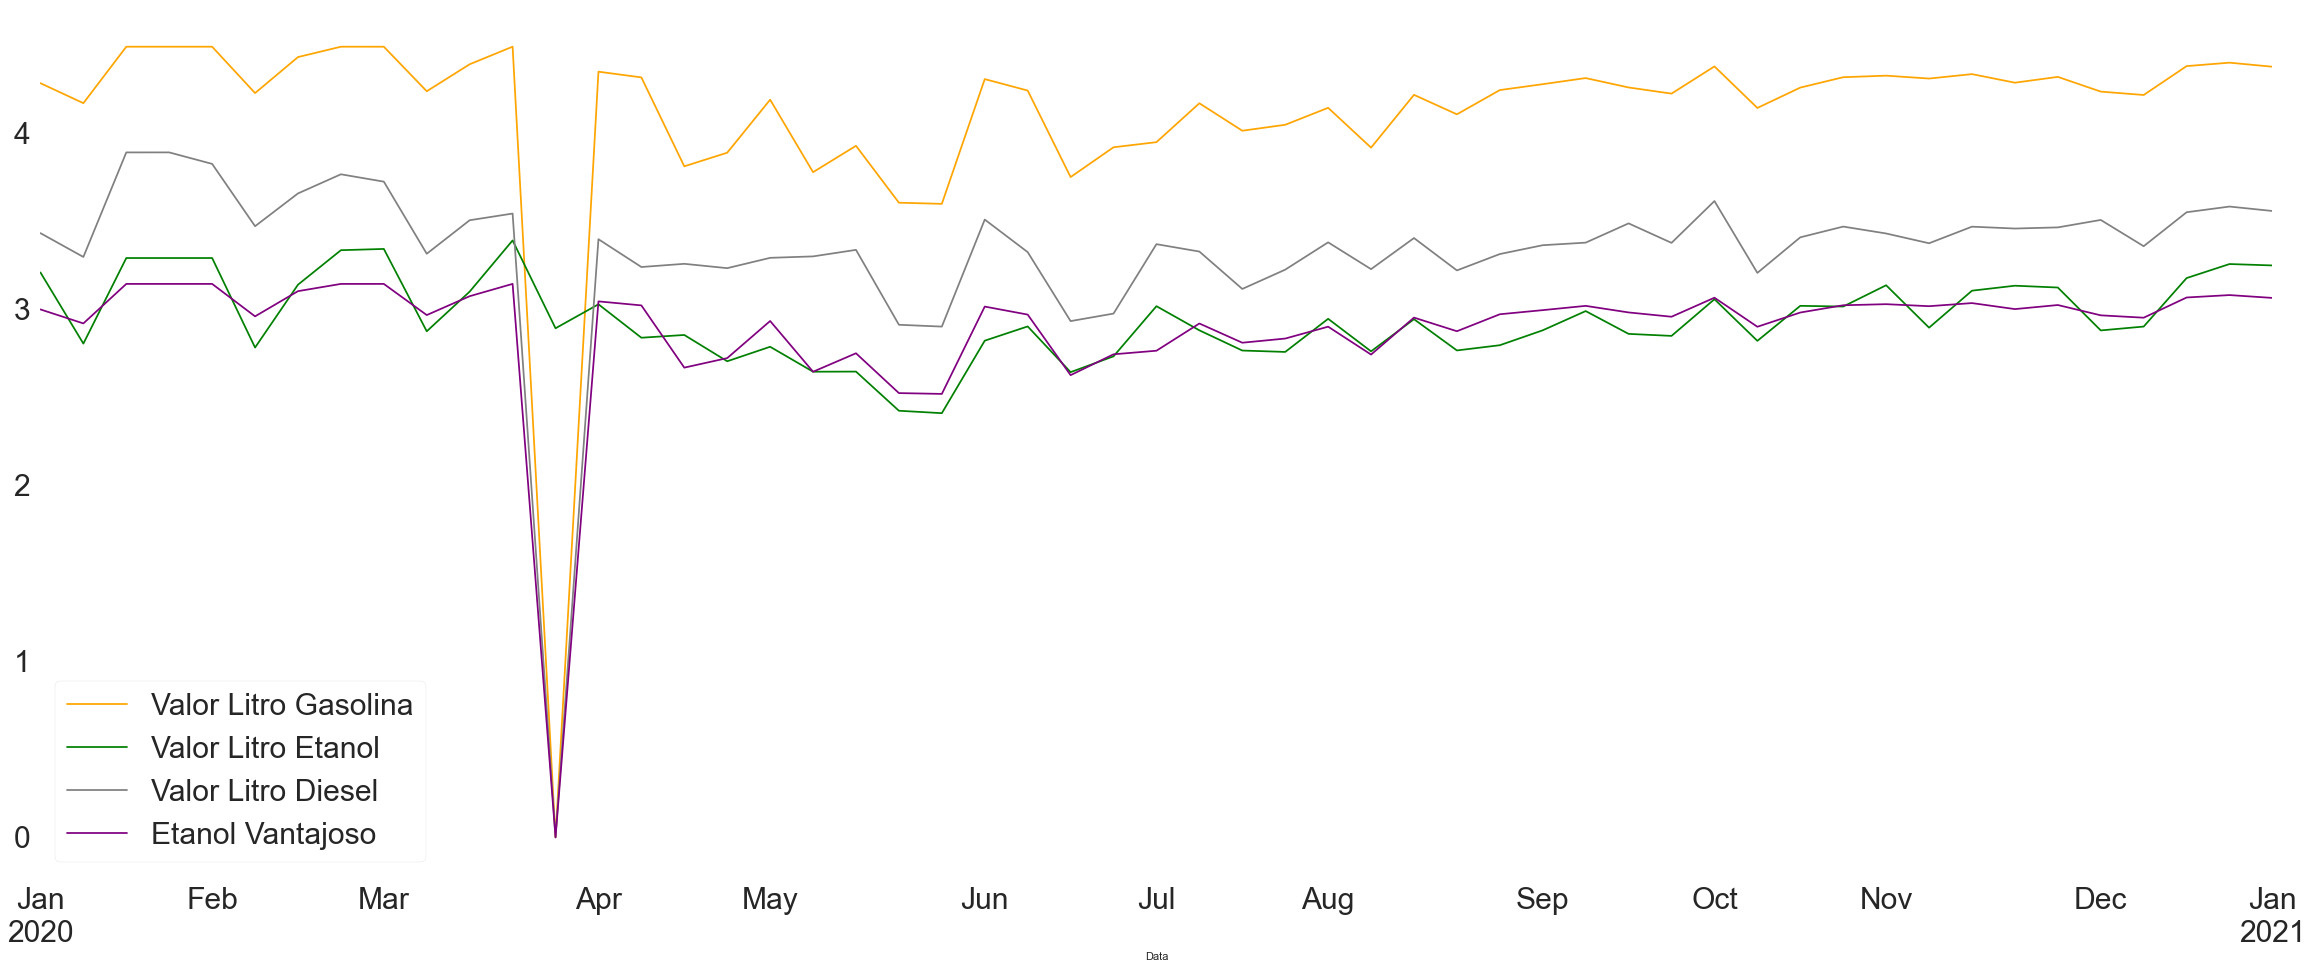

In [39]:
plt.rcParams.update({'font.size': 30, 'figure.figsize': (40, 16), 'ytick.labelsize': 30, 'xtick.labelsize': 30, 'legend.fontsize': 30})
ax = plt.gca()
dfw.plot(kind='line', x = "Data", y = "Valor Litro", ax=ax, color='orange')
dfwe.plot(kind='line', x = "Data", y = "Valor Litro", ax=ax, color='green')
dfwd.plot(kind='line', x = "Data", y = "Valor Litro", ax=ax, color='grey')
df_point.plot(kind='line', x = "Data", y = "Compensa", ax=ax, color='purple')
ax.legend(["Valor Litro Gasolina", "Valor Litro Etanol", 'Valor Litro Diesel', "Etanol Vantajoso"])
plt.savefig('movingAverage.png', dpi=72)

<AxesSubplot:xlabel='Data'>

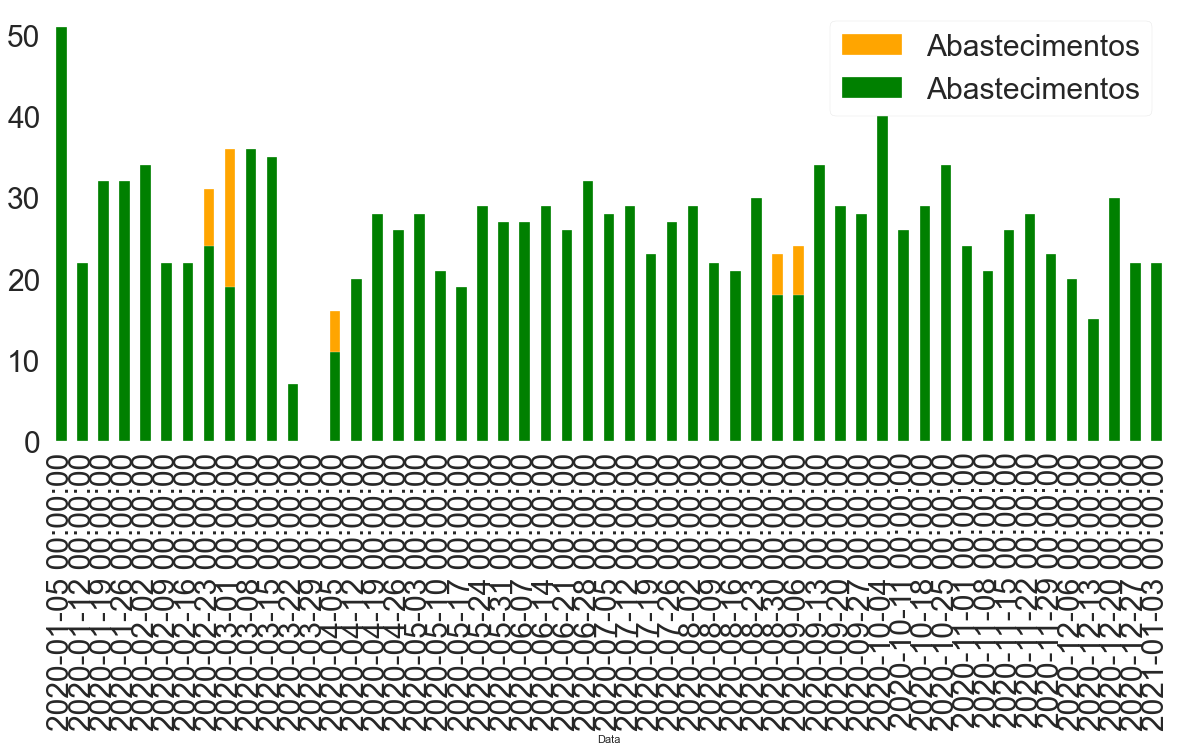

In [40]:
plt.rcParams.update({'font.size': 10, 'figure.figsize': (20, 8)})
ax = plt.gca()
dfw.plot(kind='bar', x = "Data", y = "Abastecimentos", ax=ax, color='orange')
dfwe.plot(kind='bar', x = "Data", y = "Abastecimentos", ax=ax, color='green')

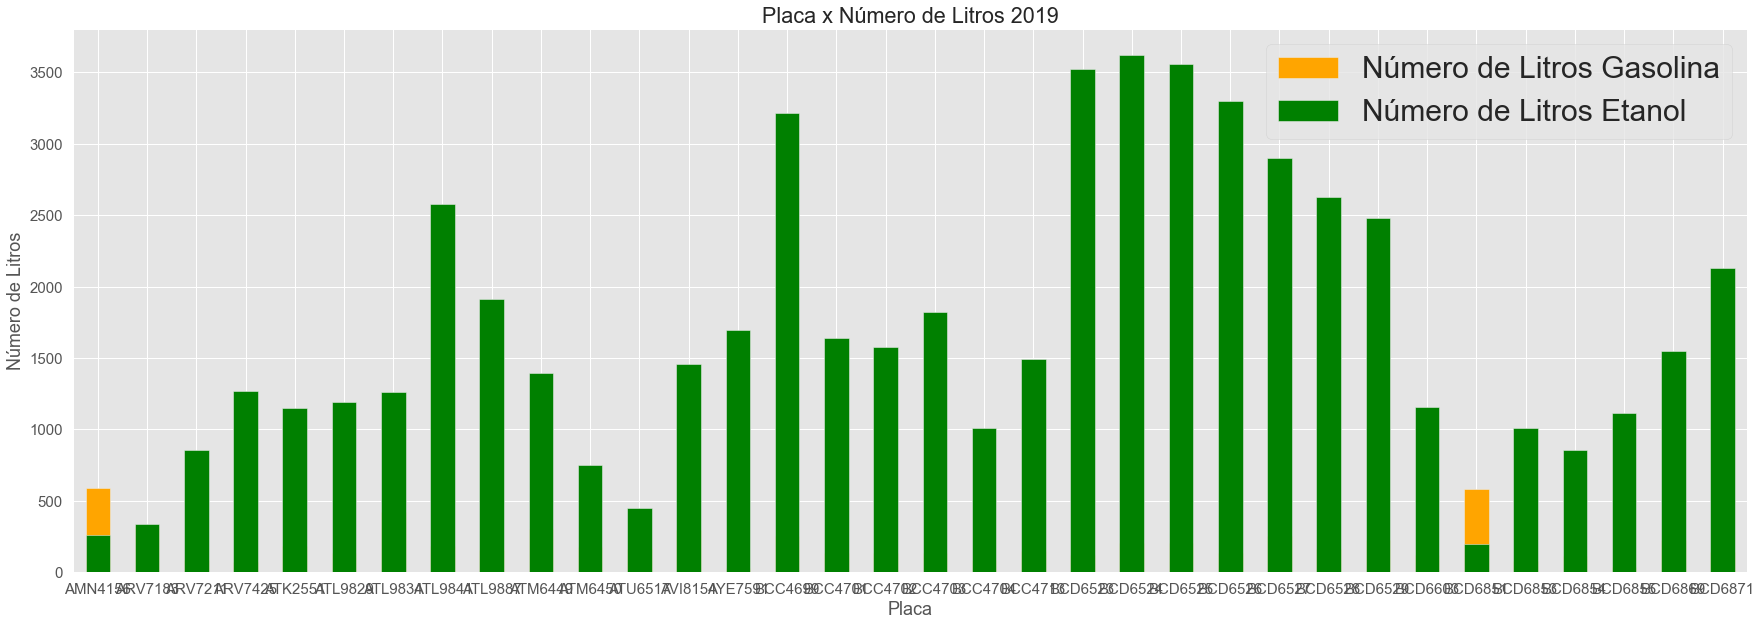

In [41]:
#set ggplot style
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 15, 'ytick.labelsize': 15, 'xtick.labelsize': 15, 'figure.figsize': (30, 15)})

#create the figure and the axes
fig, ax = plt.subplots()
dftpg = dft[dft['Produto'] == 'GASOLINA']
dftpe = dft[dft['Produto'] == 'ETANOL']

#plot the data and get the average
dftpg.plot(kind='bar', y = "Nr Litros", x ="Placa", rot = 0, ax=ax, figsize=(30, 10), color=("orange"))
dftpe.plot(kind='bar', y = "Nr Litros", x ="Placa", rot = 0, ax=ax, figsize=(30, 10), color='green')

#set limits and labels
#avggas = dftpg["Valor Litro"].mean()
#ax.axvline(avggas, color='b', label='Média', linestyle='--', linewidth=1)
#avgeta = dftpg["Valor Litro"].mean()
#ax.axvline(avgeta, color='g', label='Média', linestyle='--', linewidth=1)
ax.legend(["Número de Litros Gasolina", "Número de Litros Etanol", "Valor por Litro Gasolina"])
ax.set(title='Placa x Número de Litros 2019', xlabel='Placa', ylabel='Número de Litros')
plt.savefig('plateXnrLiters.png', dpi=72)

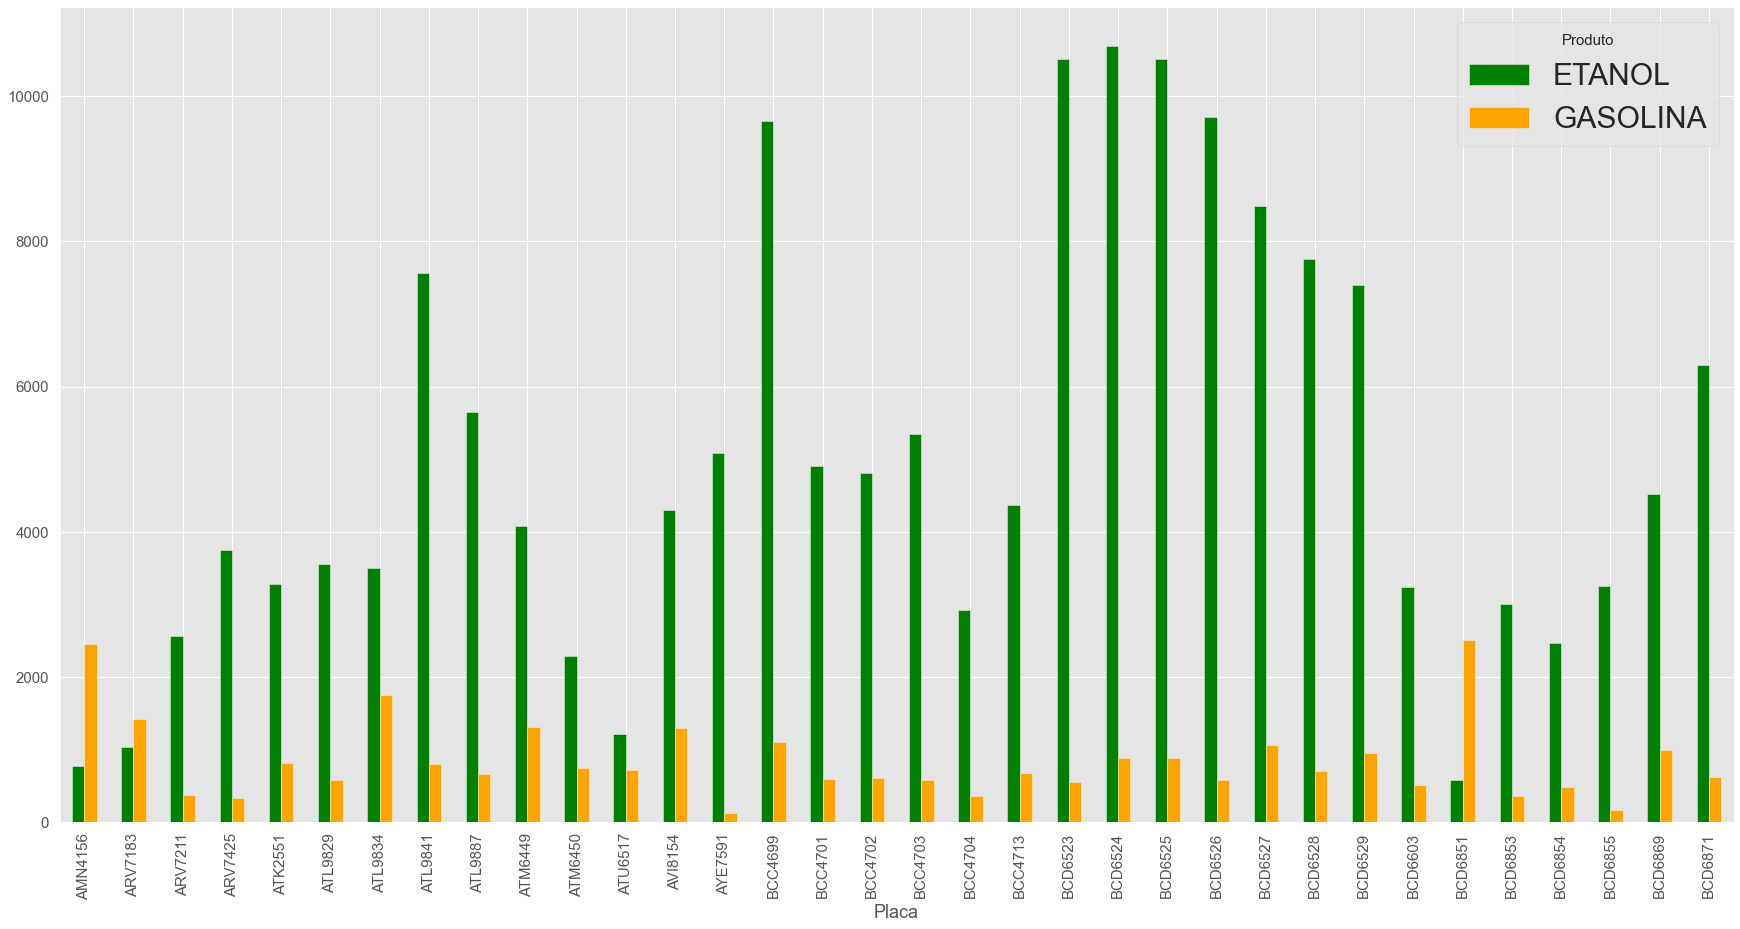

In [42]:
dft.groupby(['Placa', 'Produto'])['Valor Abast.'].mean().unstack().plot.bar(color=['green', 'orange'])
plt.savefig('plateXvalue.png')

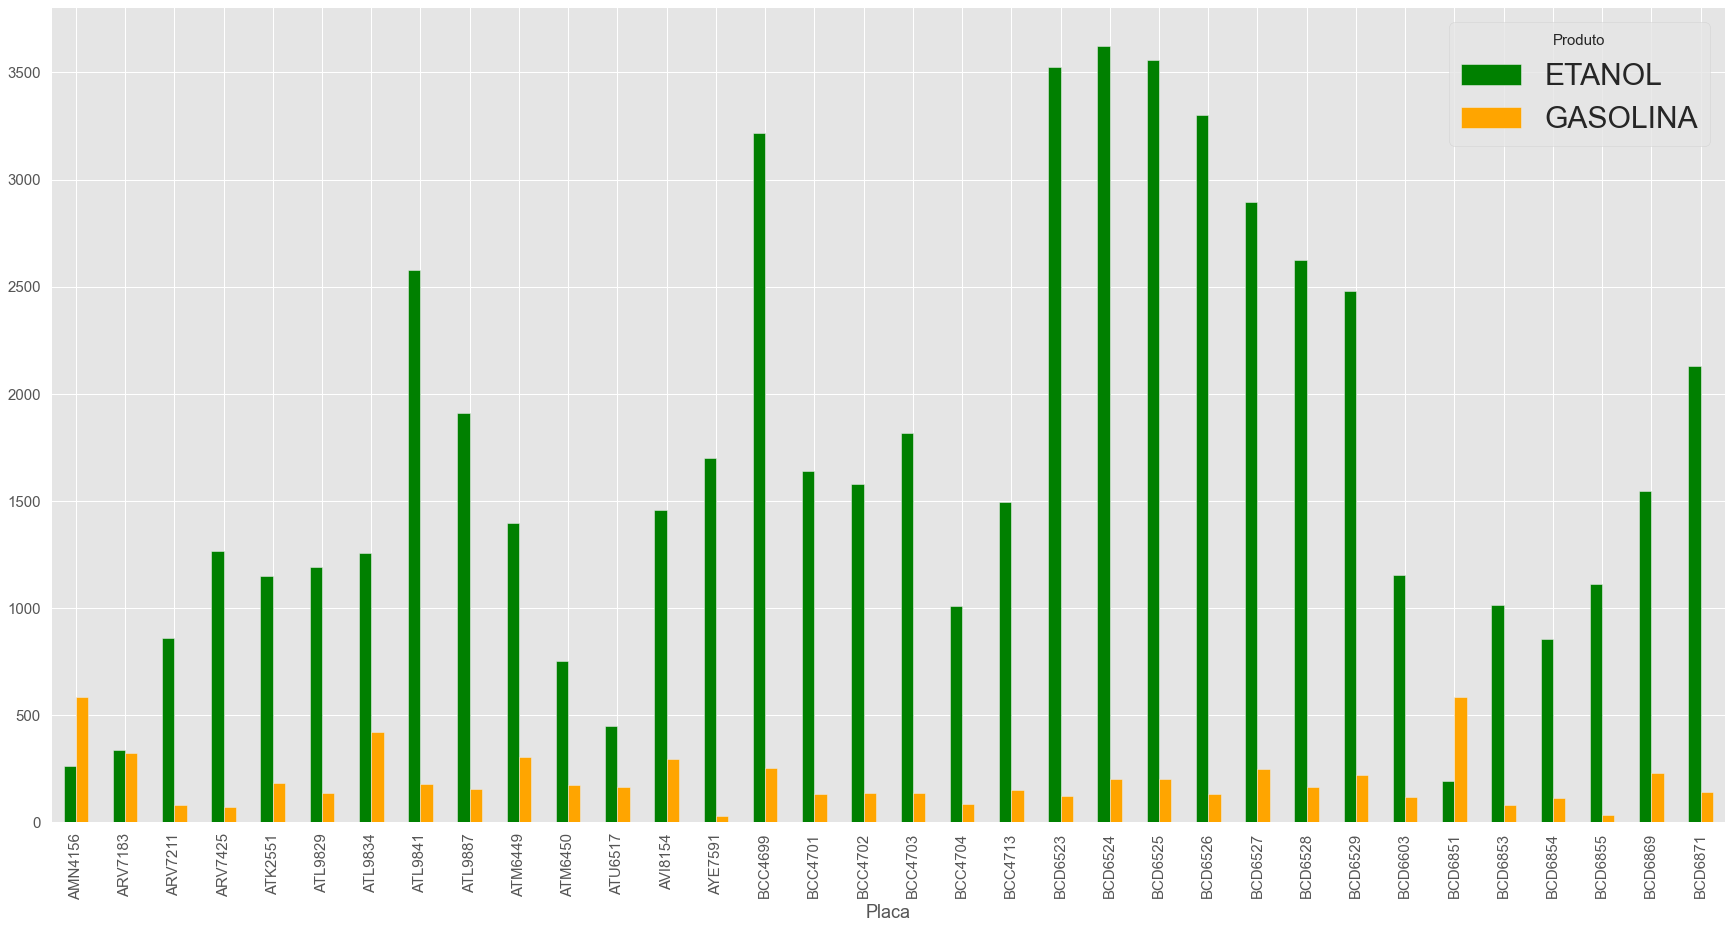

In [43]:
dft.groupby(['Placa', 'Produto'])['Nr Litros'].mean().unstack().plot.bar(color=['green', 'orange'])
plt.savefig('plateXnrLiters.png', dpi=72)

In [44]:
#test = dft[dft['Placa'] == 'ATL9829']
#test

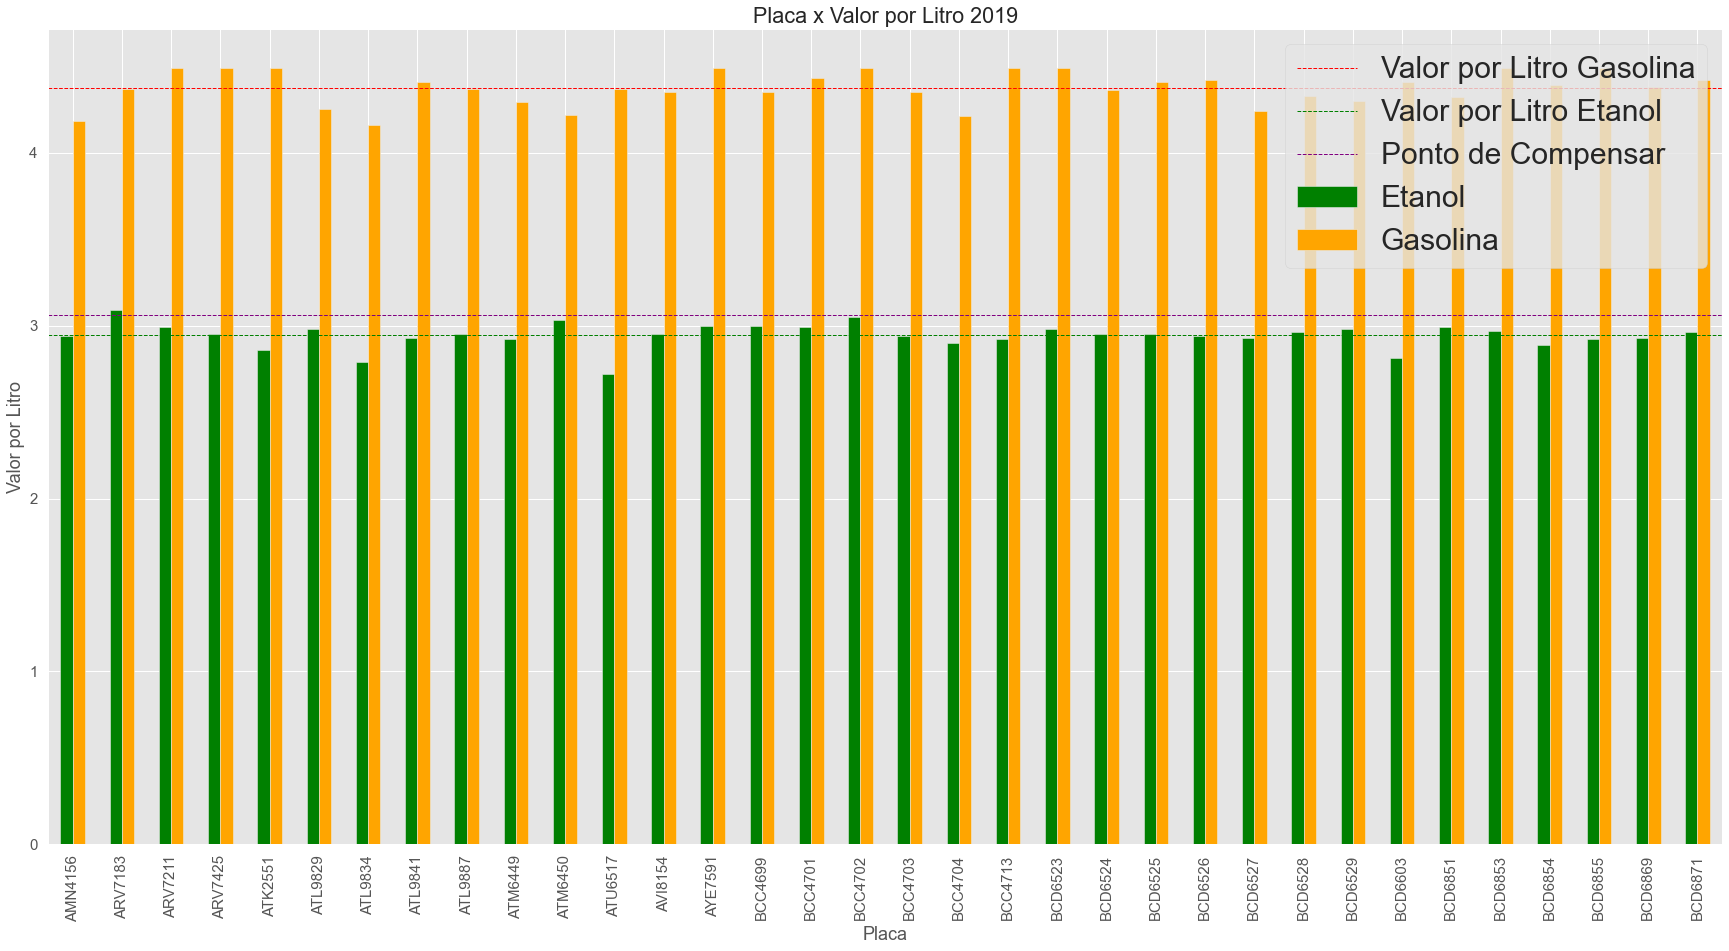

In [45]:
fig, ax = plt.subplots()
plt.rcParams.update({'font.size': 15, 'ytick.labelsize': 15, 'xtick.labelsize': 15, 'figure.figsize': (30, 18)})
dft.groupby(['Placa', 'Produto'])['Valor Litro'].mean().unstack().plot(kind="bar", ax=ax, color=['g', 'orange'])

avggas = dftpg["Valor Litro"].mean()
ax.axhline(avggas, color='r', label='Média', linestyle='--', linewidth=1)
avgeta = dftpe["Valor Litro"].mean()
ax.axhline(avgeta, color='g', label='Média', linestyle='--', linewidth=1)
worthGas = avggas * 0.7
ax.axhline(worthGas, color='purple', label='Média', linestyle='--', linewidth=1)
ax.legend(["Valor por Litro Gasolina", "Valor por Litro Etanol", "Ponto de Compensar", 'Etanol', 'Gasolina'])
ax.set(title='Placa x Valor por Litro 2019', xlabel='Placa', ylabel='Valor por Litro')
plt.savefig('plateXvaluePerLiter.png', dpi=72)

In [46]:
from datetime import datetime
#test = df[df['Produto'] == 'GASOLINA']
#df[df['Produto'] == 'DIESEL']
#test = df.query('Produto == "GASOLINA" | Produto == "ETANOL"')
testGas = df.query('Produto == "GASOLINA"')
testEta = df.query('Produto == "ETANOL"')
#df3 = df[testGas['Placa'].isin(testEta['Placa'])]
testGas = testGas[testGas['Placa'].isin(testEta['Placa'])].reset_index(drop=True)
testEta = testEta[testEta['Placa'].isin(testGas['Placa'])].reset_index(drop=True)
res = testGas
res = pd.concat([res, testEta], ignore_index=True)
res['Valor Litro'] = (res['Valor Abast.'] / res['Nr Litros']).round(2)

flexEtanol = res.query('Produto == "ETANOL"')
flexGas = res.query('Produto == "GASOLINA"')
flexGas['Worth'] = flexGas['Valor Litro'] * 0.7
#flexGas = flexGas['Valor Litro'] * 0.7 > worthGas
idx = pd.date_range('2019-01-01', '2019-12-31')
mean = flexEtanol['Valor Litro'].mean()

testEtanol = pd.merge(left=flexGas, left_on='Data',
         right=flexEtanol, right_on='Data').drop_duplicates('Data').reset_index()
testEtanol

def functionTest(currentPlate):
    for index, row in testEtanol.iterrows():
        if(str(row['Data']).split()[0] == str(currentPlate).split()[0]):
            return(row['Valor Litro_y'])

def mapGas():
    for index, row in flexGas.iterrows():
        if(row['Etanol'] == True):
            flexGas.at[index, 'Etanol'] = functionTest(flexGas.at[index, 'Data'])

pd.set_option('display.max_rows', 1500)

flexGas = flexGas.assign(Etanol = flexGas['Data'].isin(flexEtanol['Data']))
flexGas['Etanol'] = np.where(flexGas['Etanol'] == False, round(mean, 2), True)
mapGas()
flexGas['Problema'] = (flexGas['Valor Litro'] > flexGas['Worth']) & (flexGas['Worth'] > flexGas['Etanol'])

#flexEtanol = flexEtanol['Valor Litro'] > worthGas
#flexEtanol

#totalCount = flexGas.value_counts() + flexEtanol.value_counts()
#totalCount

C:\Users\Lucas Menossi\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [47]:
def functionTest(currentPlate):
    for index, row in testEtanol.iterrows():
        if(str(row['Data']).split()[0] == str(currentPlate).split()[0]):
            return(round(row['Valor Litro_x'] * 0.7, 2))

def mapGas():
    for index, row in flexEtanol.iterrows():
        if(row['Gas'] == True):
            flexEtanol.at[index, 'Worth'] = functionTest(flexEtanol.at[index, 'Data'])

Gas = res.query('Produto == "GASOLINA"')
mean = round(Gas['Valor Litro'].mean() * 0.7, 2)
flexEtanol = flexEtanol.assign(Gas = flexEtanol['Data'].isin(flexGas['Data']))
flexEtanol['Worth'] = np.where(flexEtanol['Gas'] == False, round(mean, 2), True)
mapGas()

flexEtanol['Problema'] = flexEtanol['Valor Litro'] > flexEtanol['Worth']

isProblem = flexGas[flexGas['Problema'] == True]
noProblem = flexGas[flexGas['Problema'] == False]

isProblemEtanol = flexEtanol[flexEtanol['Problema'] == True]
noProblemEtanol = flexEtanol[flexEtanol['Problema'] == False]

lineIsProblemEtanol = pd.concat([isProblemEtanol, isProblem])
lineNoProblemEtanol = pd.concat([noProblemEtanol, noProblem])

# START CALCULATING VALUES

#value = lineIsProblemEtanol['Valor Abast.'].sum()

#value

#lineIsProblemEtanol['Etanol'] = lineIsProblemEtanol['Etanol'].fillna(lineIsProblemEtanol['Valor Litro'])
#lineIsProblemEtanol['Worth'] = lineIsProblemEtanol[['Worth', 'Etanol']].min(axis=1)
#lineIsProblemEtanol['Valor Worth'] = lineIsProblemEtanol['Nr Litros'] * lineIsProblemEtanol['Worth']
#lineIsProblemEtanol['Valor Abast.'].sum() - lineIsProblemEtanol['Valor Worth'].sum() 

#noProblemEtanol['Valor Abast.'].sum() - isProblemEtanol['Valor Abast.'].sum()
noProblem

# STOP CALCULATING VALUES

#lineNoProblemEtanol = lineNoProblemEtanol.groupby(pd.Grouper(key='Data', freq='W')).agg({'Problema' : 'count'})
#lineNoProblemEtanol['Data'] = lineNoProblemEtanol.index

#lineIsProblemEtanol = lineIsProblemEtanol.groupby(pd.Grouper(key='Data', freq='W')).agg({'Problema' : 'count'})
#lineIsProblemEtanol['Data'] = lineIsProblemEtanol.index

#plt.rcParams.update({'font.size': 30, 'figure.figsize': (40, 16), 'ytick.labelsize': 30, 'xtick.labelsize': 30, 'legend.fontsize': 30})
#ax = plt.gca()
#lineIsProblemEtanol.plot(kind='line', x = "Data", y = "Problema", ax=ax, color='red')
#lineNoProblemEtanol.plot(kind='line', x = "Data", y = "Problema", ax=ax, color='green')

#ax.legend(["Não Vantajoso", "Vantajoso"])
#plt.savefig('worthAverage.png', dpi=72)

,Data,Nr Frota,Placa,Tipo,Produto,Nr Litros,Valor Abast.,Valor Litro,Worth,Etanol,Problema
0,2020-11-12,79470,BCD6851,Abast,GASOLINA,52.390,230.03,4.39,3.073,3.19,False
1,2020-12-29,79481,ATU6517,Abast,GASOLINA,35.360,155.24,4.39,3.073,3.29,False
2,2020-10-11,77166,AMN4156,Abast,GASOLINA,41.680,177.15,4.25,2.975,3.19,False
6,2020-10-16,79444,ATL9834,Abast,GASOLINA,50.470,214.01,4.24,2.968,2.99,False
7,2020-10-17,77166,AMN4156,Abast,GASOLINA,35.730,153.37,4.29,3.003,3.14,False
8,2020-10-19,79441,ATM6449,Abast,GASOLINA,50.448,214.41,4.25,2.975,2.99,False
11,2020-10-27,77166,AMN4156,Abast,GASOLINA,34.550,148.23,4.29,3.003,3.19,False
19,2020-09-22,79460,BCD6869,Abast,GASOLINA,37.871,155.24,4.10,2.870,2.89,False
28,2020-08-21,79455,BCC4703,Abast,GASOLINA,43.620,176.67,4.05,2.835,2.99,False
44,2020-07-16,79456,BCC4704,Abast,GASOLINA,43.401,171.01,3.94,2.758,2.79,False


In [48]:
#test = res[res['Valor Litro'] > worthGas]
aboveGas = flexGas[flexGas['Valor Litro'] * 0.7 > worthGas]
aboveEtanol = flexEtanol[flexEtanol['Valor Litro'] > worthGas]
total = aboveGas['Valor Abast.'].sum() + aboveEtanol['Valor Abast.'].sum()
total.round(2)

95581.48

In [49]:
#test.value_counts()
#sizes = flexGas.value_counts() + flexEtanol.value_counts()

#fig1, ax1 = plt.subplots()
#ax1.pie(sizes, labels = ['Vantajoso', 'Não vantajoso'], autopct = '%1.1f%%',shadow = True, startangle=90, colors=['green', 'red'])
#ax1.axis('equal')
#plt.show()

[Text(0.5, 1.0, 'Placa x Valor por Litro 2019'),
 Text(0.5, 0, 'Placa'),
 Text(0, 0.5, 'Valor por Litro')]

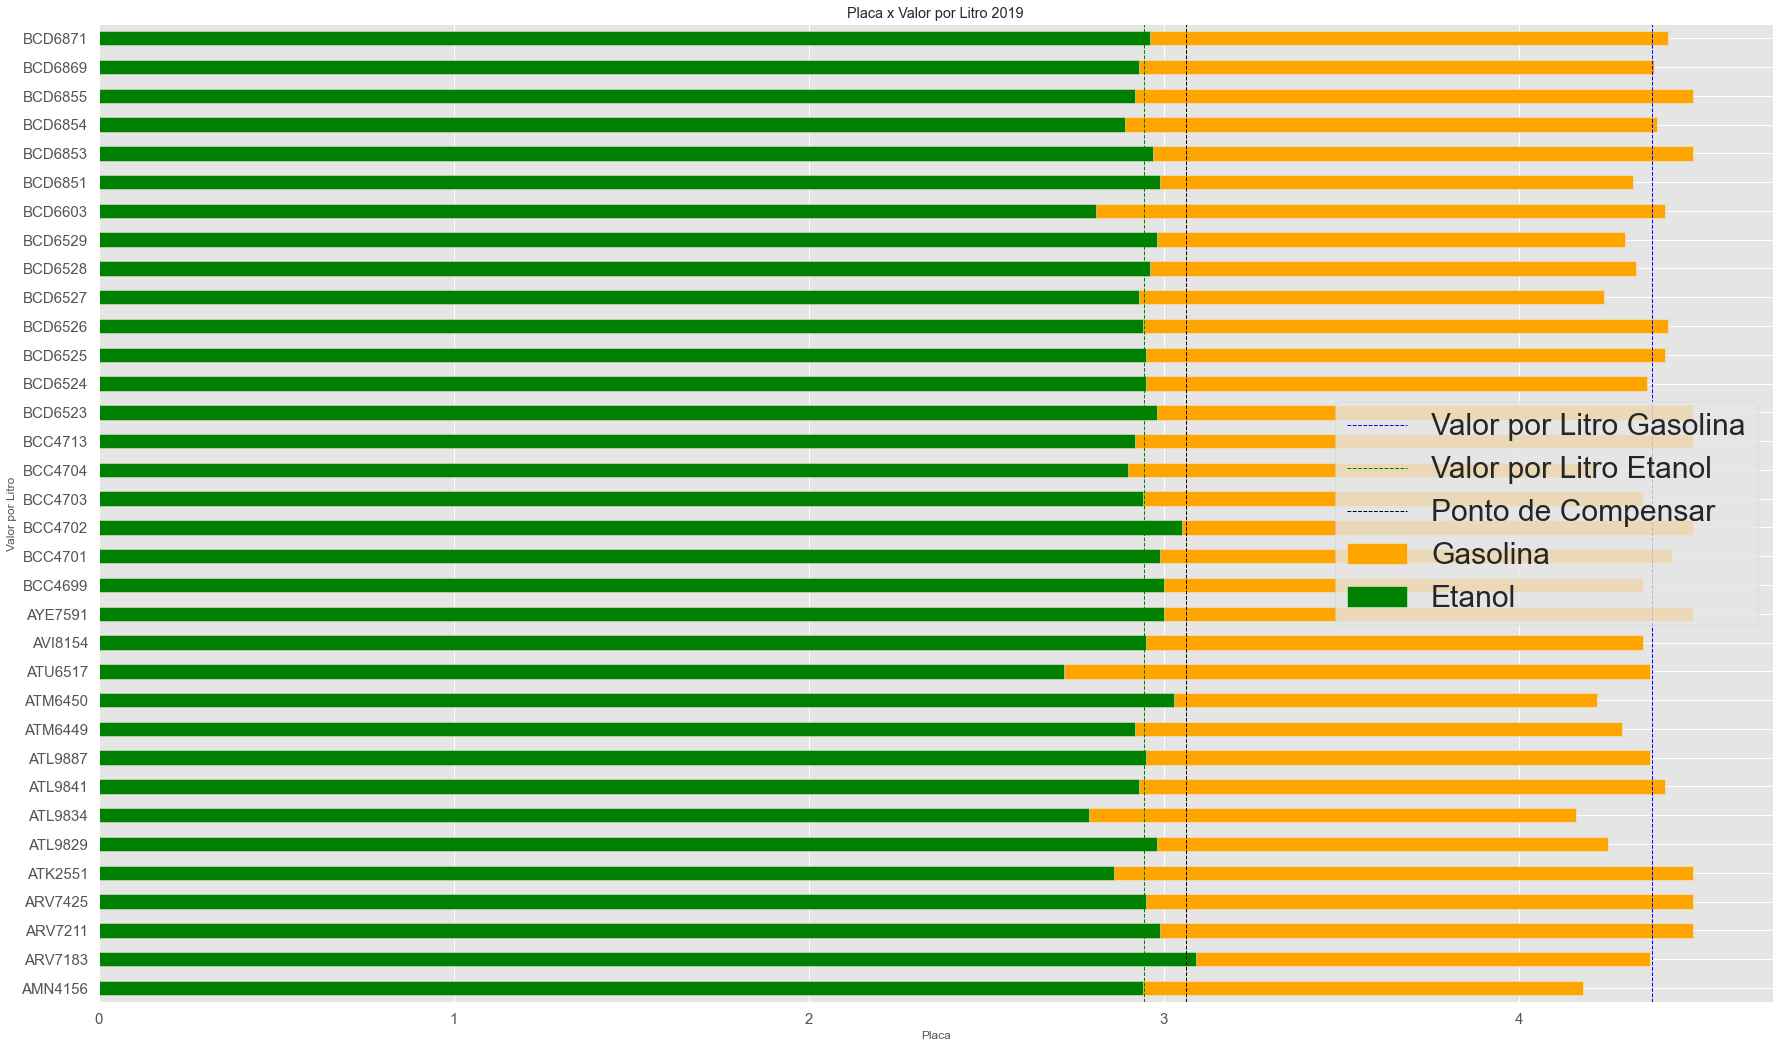

In [50]:
#set ggplot style
plt.style.use('ggplot')

#create the figure and the axes
fig, ax = plt.subplots()
dftpg = dft[dft['Produto'] == 'GASOLINA']
dftpe = dft[dft['Produto'] == 'ETANOL']

#plot the data and get the average
dftpg.plot(kind='barh', y = "Valor Litro", x ="Placa", rot = 0, ax=ax, color='orange')
dftpe.plot(kind='barh', y = "Valor Litro", x ="Placa", rot = 0, ax=ax, color='green')

#set limits and labels
avggas = dftpg["Valor Litro"].mean()
ax.axvline(avggas, color='b', label='Média', linestyle='--', linewidth=1)
avgeta = dftpe["Valor Litro"].mean()
ax.axvline(avgeta, color='g', label='Média', linestyle='--', linewidth=1)
worthGas = avggas * 0.7
ax.axvline(worthGas, color='black', label='Média', linestyle='--', linewidth=1)

ax.legend(["Valor por Litro Gasolina", "Valor por Litro Etanol", "Ponto de Compensar", 'Gasolina', 'Etanol'])
ax.set(title='Placa x Valor por Litro 2019', xlabel='Placa', ylabel='Valor por Litro')
#ax1.legend(["Valor por Litro Gasolina", "Número de Litros Etanol"])
#ax1.set(title='Placa x Número de Litros 05/2019 Etanol', xlabel='Placa', ylabel='Número de Litros')

In [51]:
df["Produto"].value_counts()

ETANOL      1355
GASOLINA     897
DIESEL       611
Name: Produto, dtype: int64

In [52]:
avgeta = dftpe["Valor Litro"].mean()
avgeta

2.942941176470588

In [53]:
df["Produto"].value_counts(normalize=True)

ETANOL      0.473280
GASOLINA    0.313308
DIESEL      0.213413
Name: Produto, dtype: float64

In [54]:
df["Tipo"].value_counts(normalize=True)

Abast     0.990569
Consum    0.009431
Name: Tipo, dtype: float64

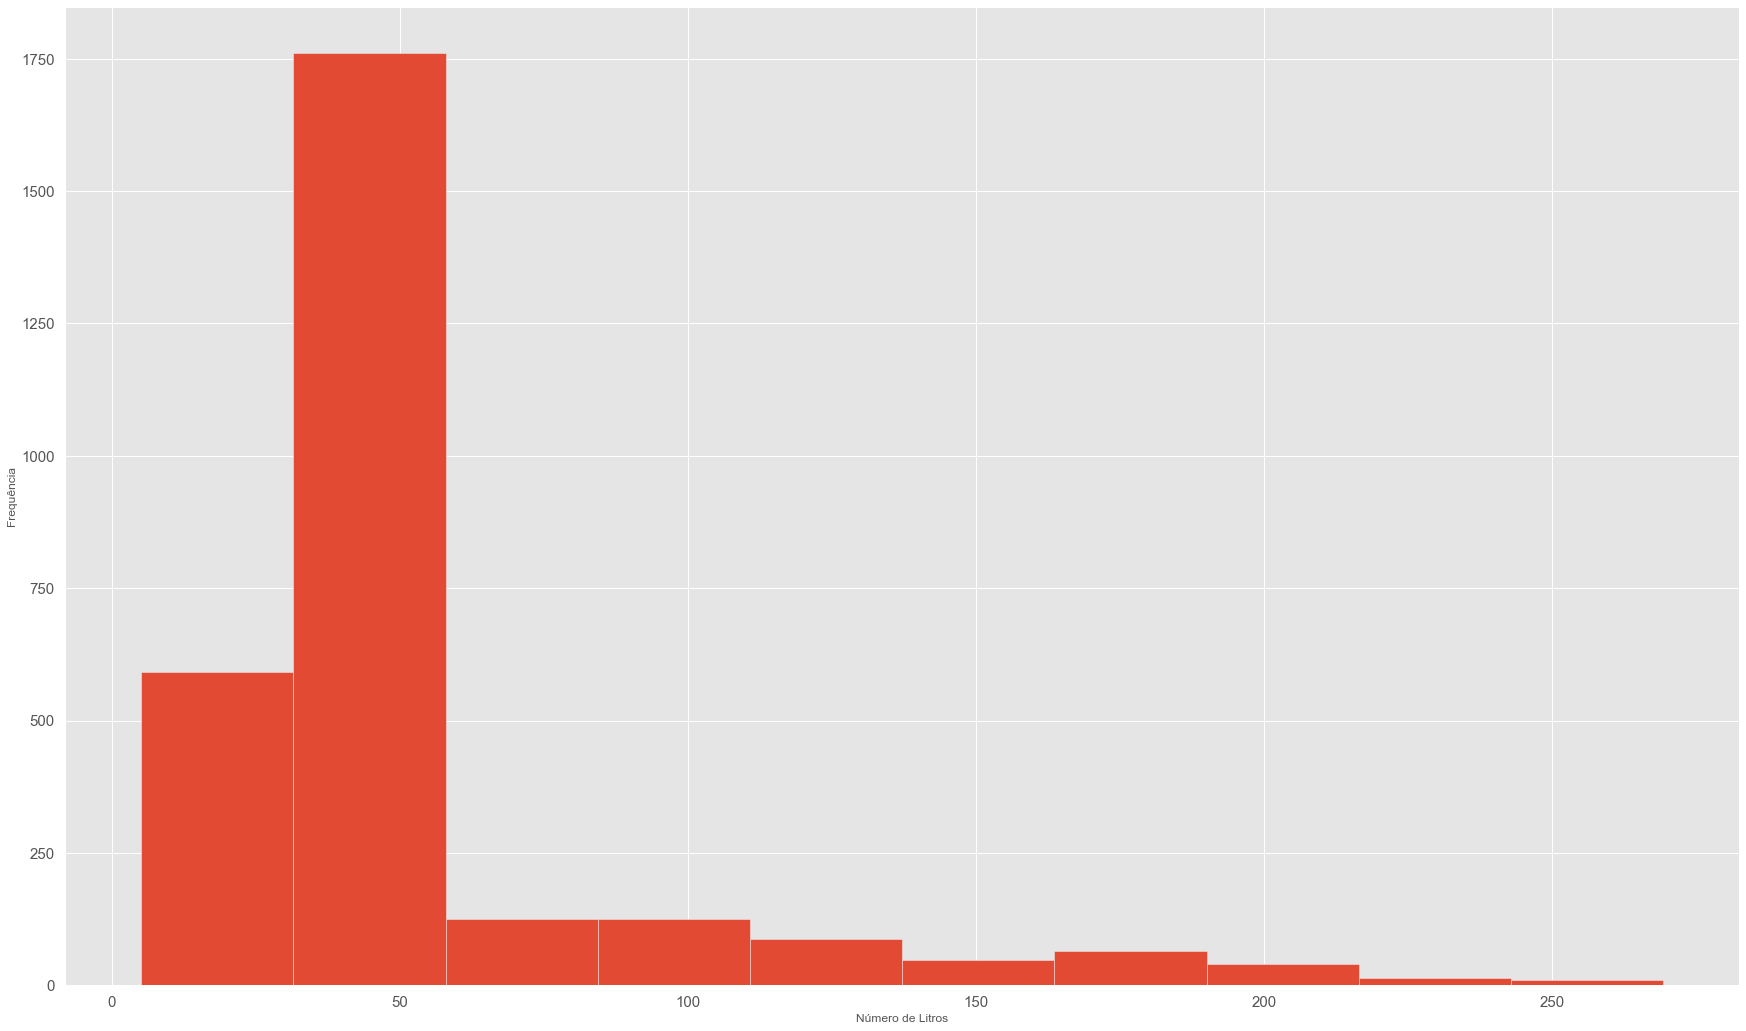

In [55]:
#Ploting
fig, ax = plt.subplots(1,1)
ax.hist(df["Nr Litros"])
ax.set_xlabel('Número de Litros')
ax.set_ylabel('Frequência')
plt.rcParams.update({'font.size': 10, 'figure.figsize': (10, 8)})
#Gráfico de barras em relação ao número de litros
plt.show()
#plt.savefig('frequencyLiters.png', dpi=100)

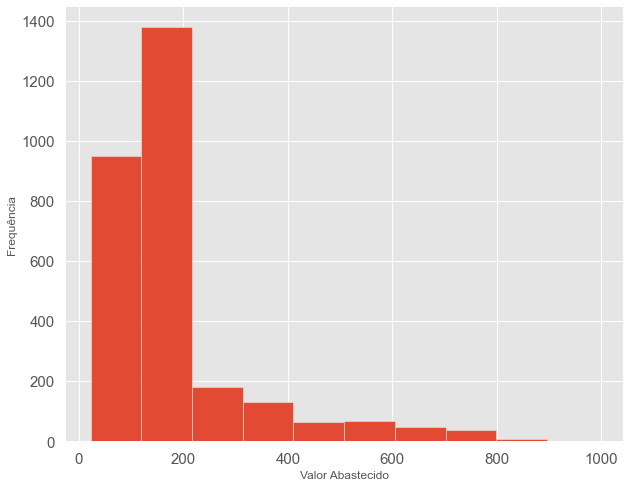

In [56]:
#Ploting
fig, ax = plt.subplots(1,1)
ax.hist(df["Valor Abast."])
ax.set_xlabel('Valor Abastecido')
ax.set_ylabel('Frequência')
plt.rcParams.update({'font.size': 10, 'figure.figsize': (10, 8)})
#Gráfico de barras em relação ao número de litros
#plt.savefig('frequencyValue.png', dpi=100)
plt.show()

In [57]:
df["Nr Litros"].describe()

count    2863.000000
mean       52.308439
std        41.453918
min         5.126000
25%        34.365500
50%        43.350000
75%        49.715500
max       269.230000
Name: Nr Litros, dtype: float64

<AxesSubplot:>

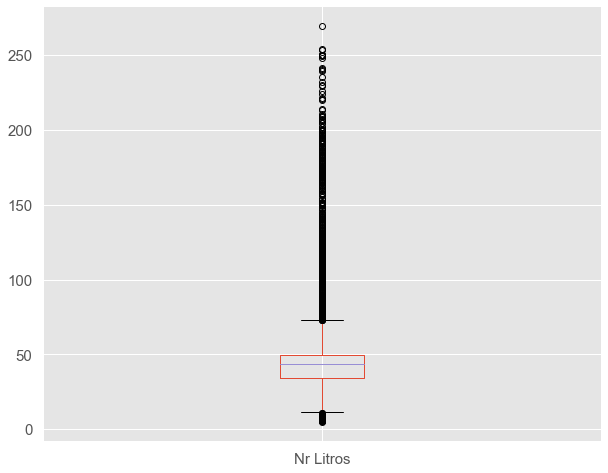

In [58]:
df["Nr Litros"].plot(kind="box")

<AxesSubplot:title={'center':'Valor Abast. x Nr Litros'}, xlabel='Valor Abast.', ylabel='Nr Litros'>

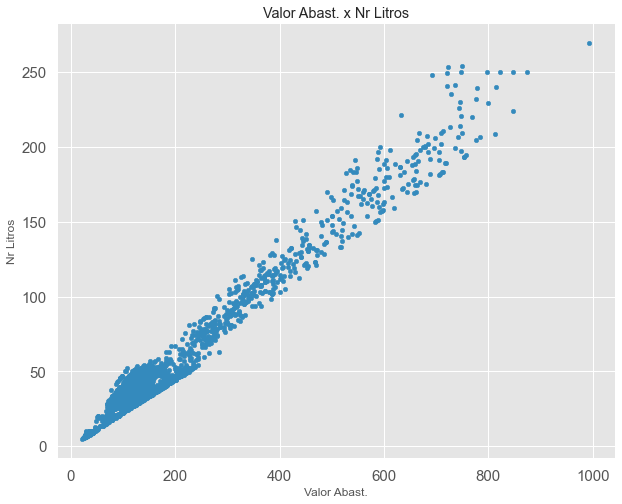

In [59]:
df.plot(kind='scatter', x = "Valor Abast.", y="Nr Litros", title="Valor Abast. x Nr Litros")

<AxesSubplot:title={'center':'Nr Litros'}, xlabel='Produto'>

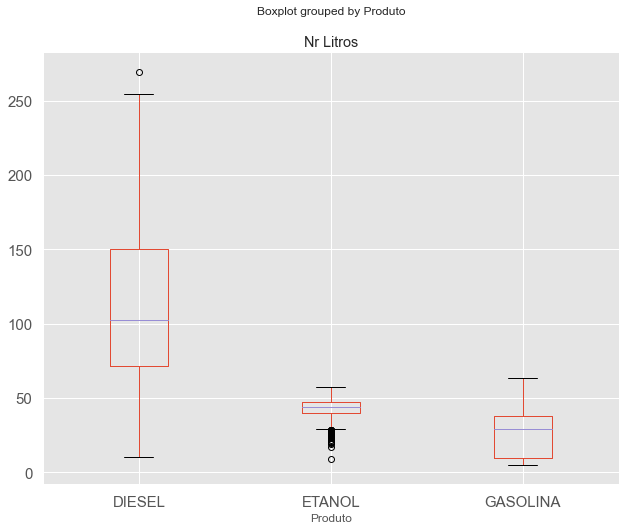

In [60]:
df.boxplot(column="Nr Litros", by="Produto")

C:\Users\Lucas Menossi\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)
C:\Users\Lucas Menossi\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


<AxesSubplot:xlabel='Data'>

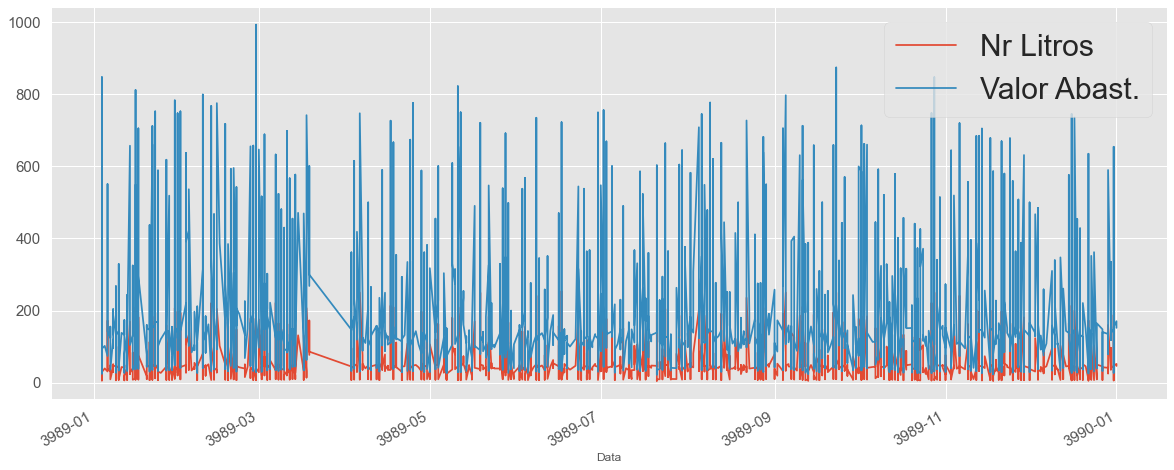

In [61]:
plt.rcParams.update({'font.size': 10, 'figure.figsize': (20, 8)})
ax = plt.gca()
df.plot(kind='line', x = "Data", y = "Nr Litros", ax=ax)
df.plot(kind='line', x = "Data", y = "Valor Abast.", ax=ax)

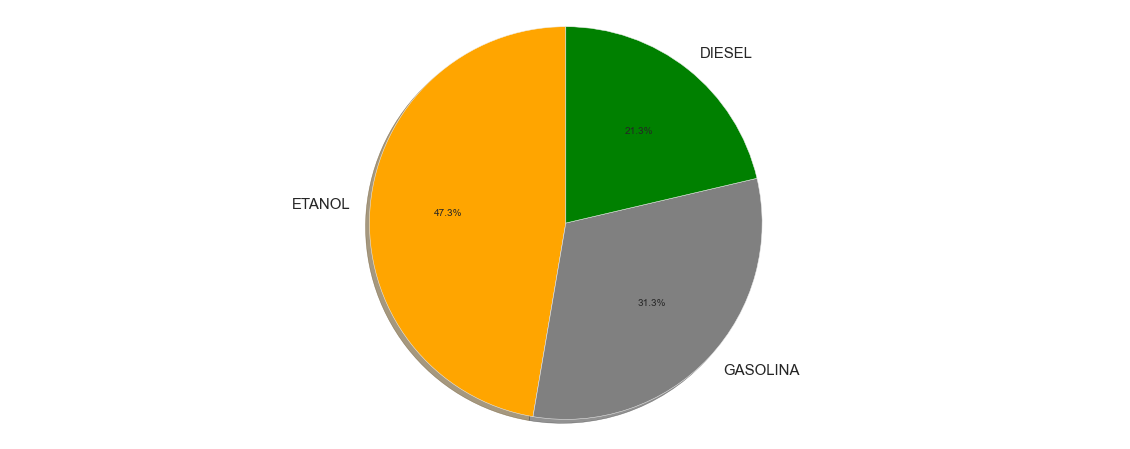

In [62]:
labels = df["Produto"].unique()
sizes = df["Produto"].value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels = labels, autopct = '%1.1f%%' ,shadow = True, startangle=90, colors=['orange', 'grey', 'green'])
ax1.axis('equal')
plt.show()

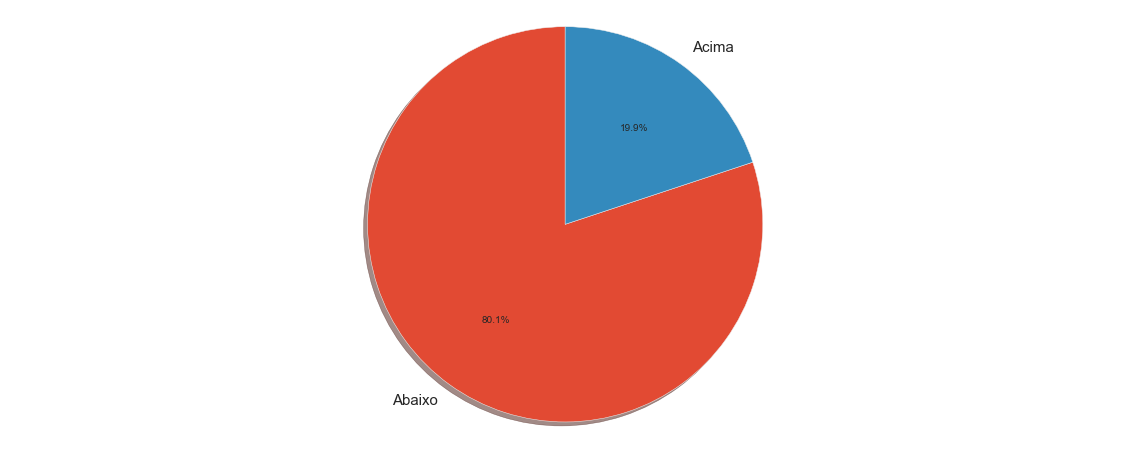

In [63]:
labels = ["Abaixo", "Acima"]
teste = df["Nr Litros"] >= df["Nr Litros"].mean()
sizes = teste.value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels = labels, autopct = '%1.1f%%' ,shadow = True, startangle=90)
ax1.axis('equal')
plt.show()

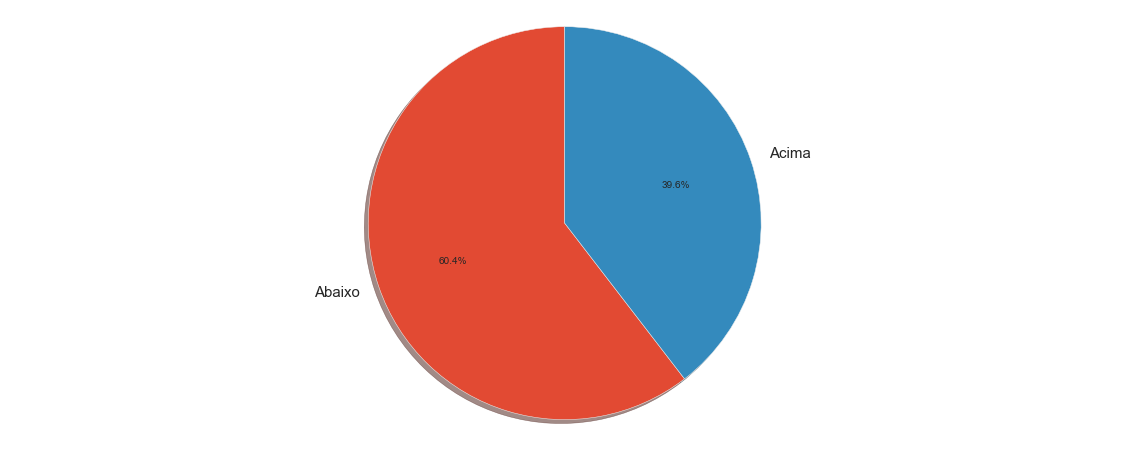

In [64]:
labels = ["Abaixo", "Acima"]
teste = df["Placa"].value_counts() >= df["Placa"].value_counts().mean()
sizes = teste.value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels = labels, autopct = '%1.1f%%' ,shadow = True, startangle=90)
ax1.axis('equal')
plt.show()

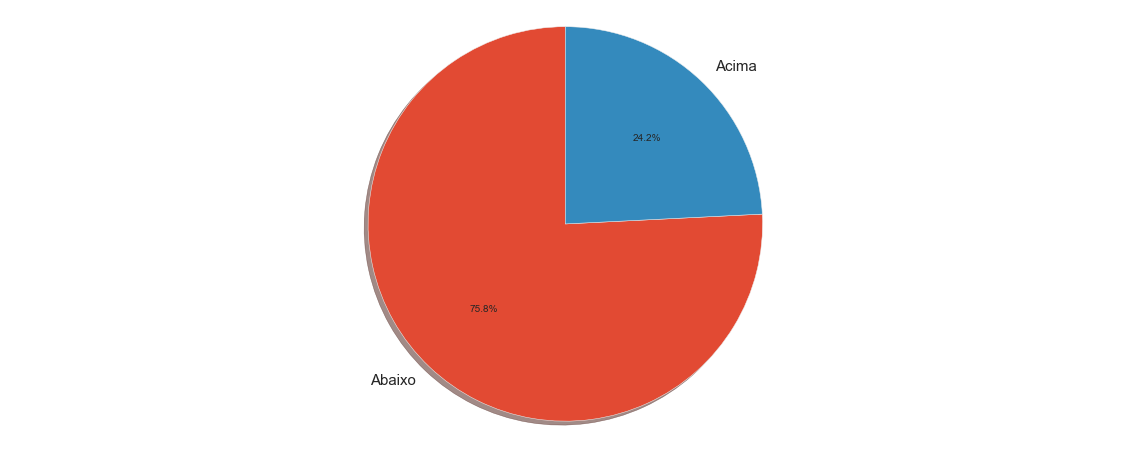

In [65]:
labels = ["Abaixo", "Acima"]
teste = df["Valor Abast."] >= df["Valor Abast."].mean()
sizes = teste.value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels = labels, autopct = '%1.1f%%' ,shadow = True, startangle=90)
ax1.axis('equal')
plt.show()

C:\Users\Lucas Menossi\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\Users\Lucas Menossi\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\Users\Lucas Menossi\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


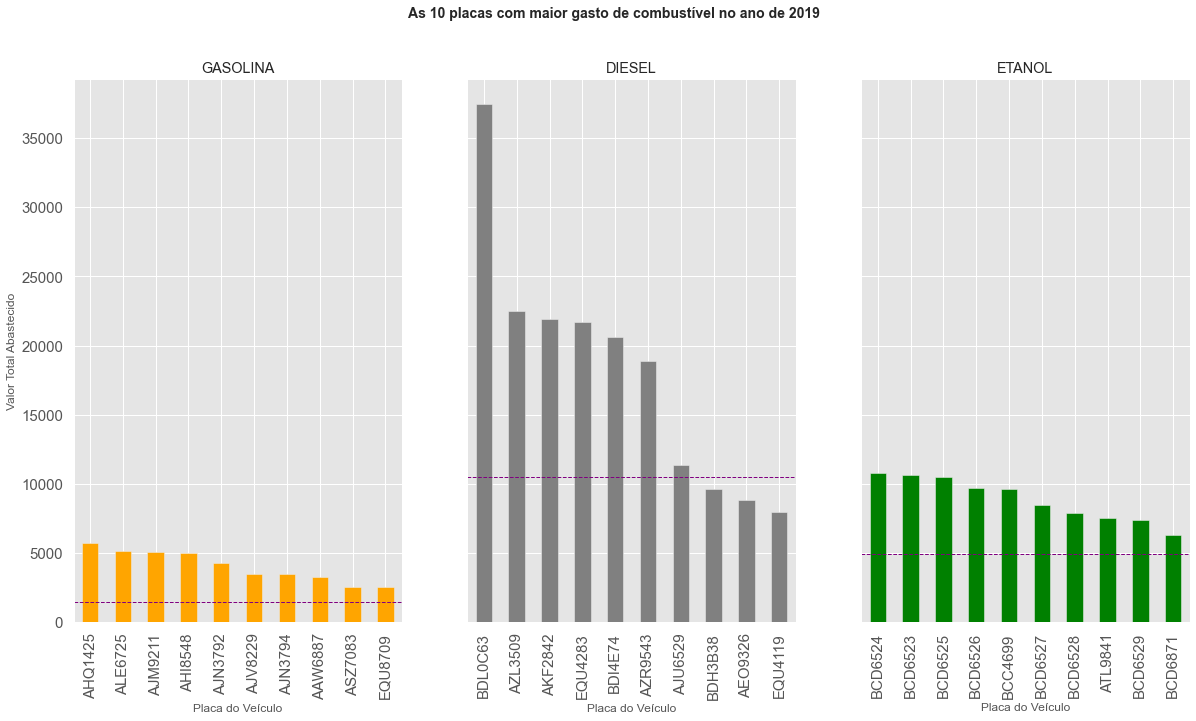

In [66]:
top_10_g = df[df["Produto"] == "GASOLINA"]
top_10_d = df[df["Produto"] == "DIESEL"]
top_10_e = df[df["Produto"] == "ETANOL"]

meanGas = df[df["Produto"] == "GASOLINA"].groupby('Placa').agg({'Valor Abast.' : 'sum'})
meanGas = meanGas['Valor Abast.'].mean()

meanEtanol = df[df["Produto"] == "ETANOL"].groupby('Placa').agg({'Valor Abast.' : 'sum'})
meanEtanol = meanEtanol['Valor Abast.'].mean()

meanDiesel = df[df["Produto"] == "DIESEL"].groupby('Placa').agg({'Valor Abast.' : 'sum'})
meanDiesel = meanDiesel['Valor Abast.'].mean()

#set ggplot style
plt.style.use('ggplot')

#plot data GASOLINA
top_10_g = (top_10_g.groupby('Placa')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'sum', 'Nr Litros': 'sum'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10_g.rename(columns={'Placa': 'Placa', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

#plot data DIESEL
top_10_d = (top_10_d.groupby('Placa')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'sum', 'Nr Litros': 'sum'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10_d.rename(columns={'Placa': 'Placa', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

#plot data ETANOL
top_10_e = (top_10_e.groupby('Placa')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'sum', 'Nr Litros': 'sum'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10_e.rename(columns={'Placa': 'Placa', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)


#plot the data and get the average
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1,ncols=3, sharey=True, figsize=(20, 10))
#plot GASOLINA
top_10_g.plot(kind='bar', y="Valor Abastecido", x="Placa", ax=ax0, color='orange')
ax0.set(title='GASOLINA', xlabel='Placa do Veículo', ylabel='Valor Total Abastecido')
ax0.axhline(meanGas, color='purple', label='Média', linestyle='--', linewidth=1)
#plot DIESEL
top_10_d.plot(kind='bar', y="Valor Abastecido", x="Placa", ax=ax1, color='grey')
ax1.set(title='DIESEL', xlabel='Placa do Veículo', ylabel='')
ax1.axhline(meanDiesel, color='purple', label='Média', linestyle='--', linewidth=1)
#plot ETANOL
top_10_e.plot(kind='bar', y="Valor Abastecido", x="Placa", ax=ax2, color='green')
ax2.set(title='ETANOL', xlabel='Placa do Veículo', ylabel='')
ax2.axhline(meanEtanol, color='purple', label='Média', linestyle='--', linewidth=1)

#set limits and labels
#ax.set(title='As 10 placas com maior gasto de combustível em Janeiro de 2019 por tipo', xlabel='Placa do Veículo', ylabel='Valor Abastecido Total')
fig.suptitle('As 10 placas com maior gasto de combustível no ano de 2019', fontsize=14, fontweight='bold')
    
#hide the legend
ax2.legend().set_visible(False)
ax1.legend().set_visible(False)
ax0.legend().set_visible(False)
plt.savefig('top10Fuel.png', dpi=72)

In [67]:
meanGas = df[df["Produto"] == "GASOLINA"].groupby('Placa').agg({'Valor Abast.' : 'sum'})
meanGas = meanGas['Valor Abast.'].mean()

meanEtanol = df[df["Produto"] == "ETANOL"].groupby('Placa').agg({'Valor Abast.' : 'sum'})
meanEtanol = meanEtanol['Valor Abast.'].mean()

meanDiesel = df[df["Produto"] == "DIESEL"].groupby('Placa').agg({'Valor Abast.' : 'sum'})
meanDiesel = meanDiesel['Valor Abast.'].mean()

meanDiesel

10519.469090909088

C:\Users\Lucas Menossi\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  if __name__ == '__main__':
C:\Users\Lucas Menossi\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  
C:\Users\Lucas Menossi\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


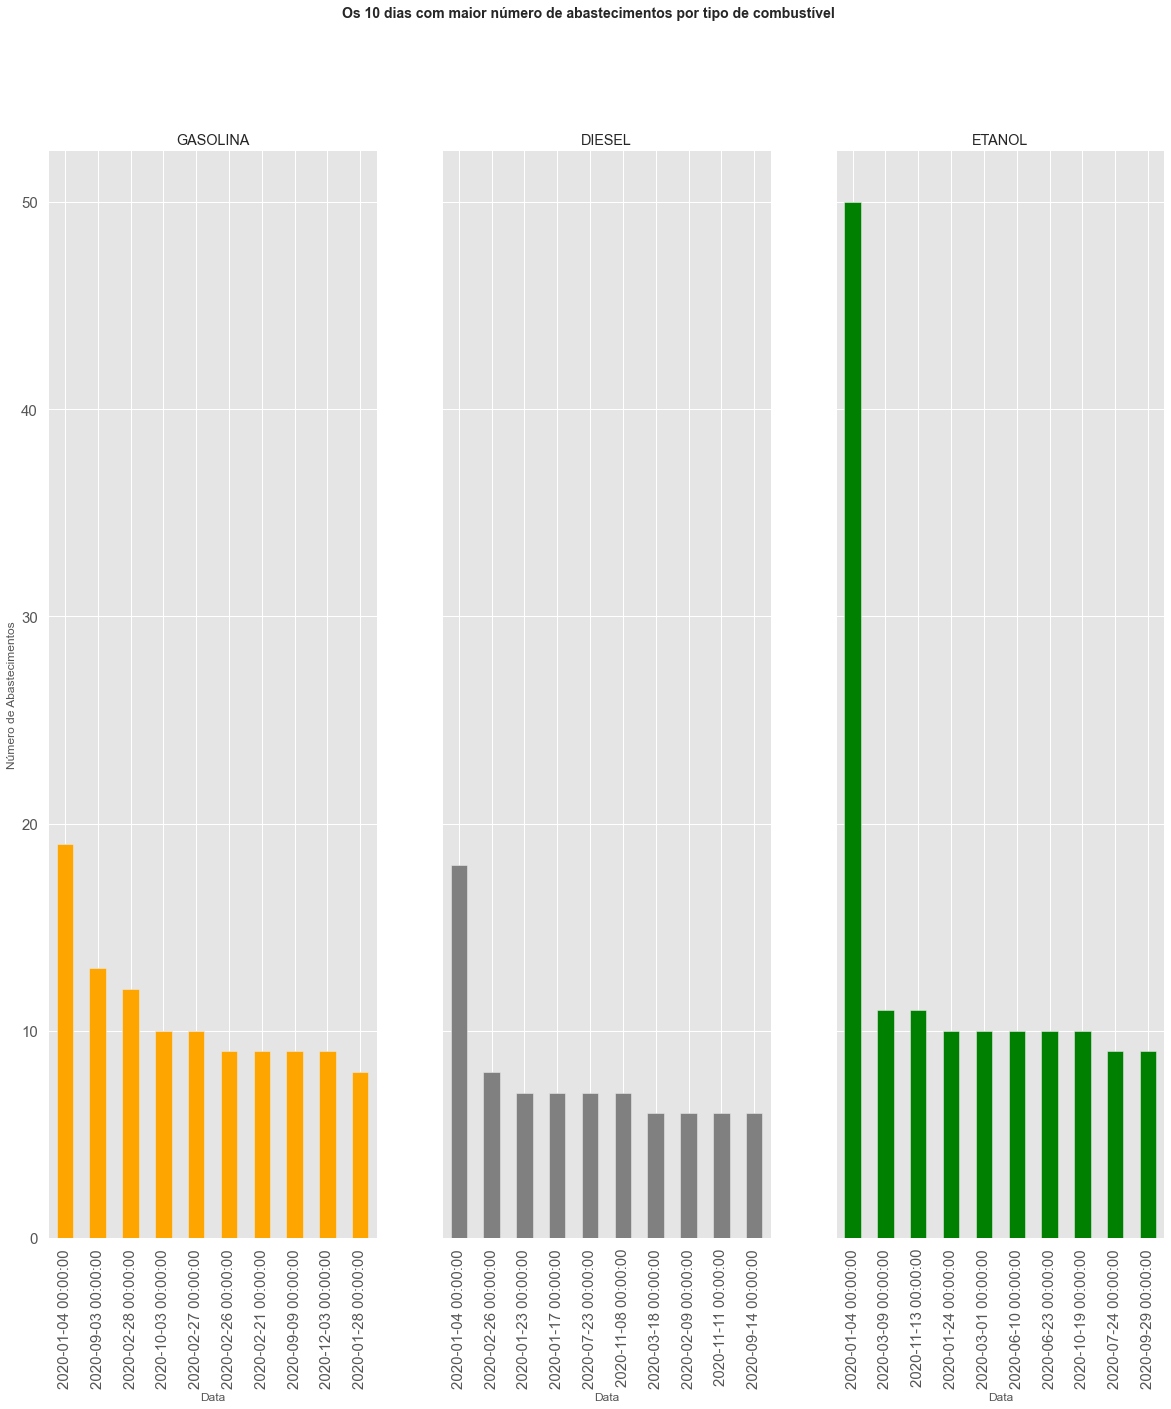

In [68]:
top_10_g = df[df["Produto"] == "GASOLINA"]
top_10_d = df[df["Produto"] == "DIESEL"]
top_10_e = df[df["Produto"] == "ETANOL"]

#set ggplot style
plt.style.use('ggplot')

#plot data GASOLINA
top_10_g = (top_10_g.groupby('Data')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'count', 'Nr Litros': 'count'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10_g.rename(columns={'Data': 'Data', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

#plot data DIESEL
top_10_d = (top_10_d.groupby('Data')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'count', 'Nr Litros': 'count'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10_d.rename(columns={'Data': 'Data', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

#plot data ETANOL
top_10_e = (top_10_e.groupby('Data')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'count', 'Nr Litros': 'count'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10_e.rename(columns={'Data': 'Data', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

#create the figure and the axes
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1,ncols=3, sharey=True, figsize=(20, 20))


#plot GASOLINA
top_10_g.plot(kind='bar', y = "Valor Abastecido", x ="Data", ax=ax0, color='orange')
ax0.set(title="GASOLINA", xlabel='Data', ylabel='Número de Abastecimentos')

#plot DIESEL
top_10_d.plot(kind='bar', y = "Valor Abastecido", x ="Data", ax=ax1, color='grey')
ax1.set(title="DIESEL", xlabel='Data', ylabel='')

#plot ETANOL
top_10_e.plot(kind='bar', y = "Valor Abastecido", x ="Data", ax=ax2, color='green')
ax2.set(title="ETANOL", xlabel='Data', ylabel='')

#set limits and labels
fig.suptitle('Os 10 dias com maior número de abastecimentos por tipo de combustível', fontsize=14, fontweight='bold')

#hide the legend
ax0.legend().set_visible(False)
ax1.legend().set_visible(False)
ax2.legend().set_visible(False)
plt.savefig('top10Days.png', dpi=72)

In [76]:
df[df['Data'] == '2020-01-04 00:00:00']

,Data,Nr Frota,Placa,Tipo,Produto,Nr Litros,Valor Abast.
1917,2020-01-04,79412,AHI8548,Abast,GASOLINA,37.440,160.63
1918,2020-01-04,79466,BCD6527,Abast,ETANOL,47.180,150.51
1919,2020-01-04,79462,BCD6523,Abast,ETANOL,46.210,147.42
1920,2020-01-04,79465,BCD6526,Abast,ETANOL,47.330,150.99
1921,2020-01-04,79468,BCD6529,Abast,ETANOL,44.360,141.52
1922,2020-01-04,79463,BCD6524,Abast,ETANOL,46.560,148.54
1923,2020-01-04,79464,BCD6525,Abast,ETANOL,47.160,150.45
1924,2020-01-04,79431,ARV7286,Abast,GASOLINA,29.330,125.84
1925,2020-01-04,79449,AYE7591,Abast,ETANOL,29.570,94.34
1926,2020-01-04,79464,BCD6525,Abast,ETANOL,30.787,105.30


C:\Users\Lucas Menossi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


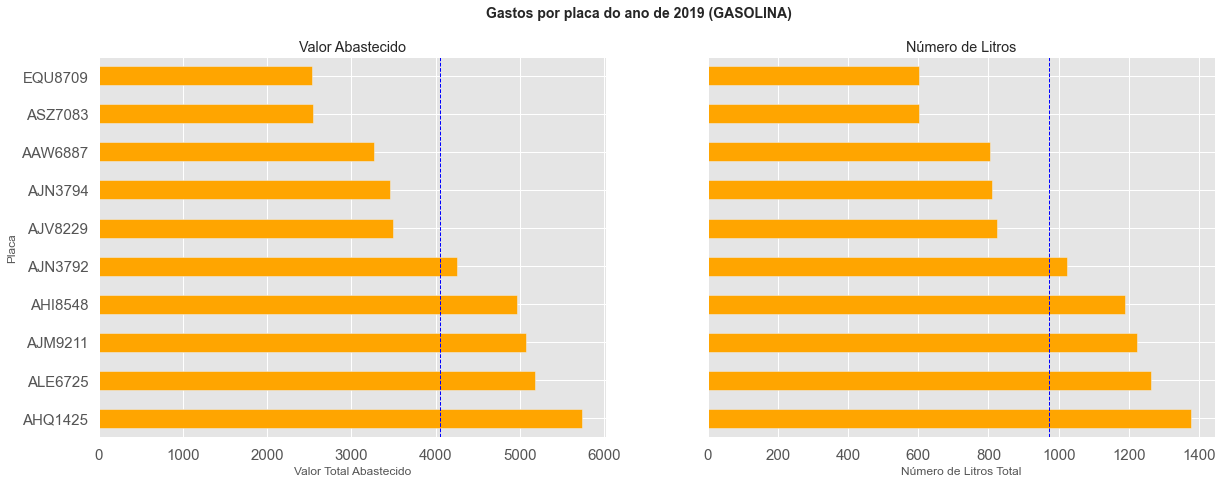

In [69]:
#get the figure and the axes
top_10 = df[df["Produto"] == "GASOLINA"]

#plot data GASOLINA
top_10 = (top_10.groupby('Placa')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'sum', 'Nr Litros': 'sum'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10.rename(columns={'Placa': 'Placa', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, sharey=True, figsize=(20, 7))
top_10.plot(kind='barh', y="Valor Abastecido", x="Placa", ax=ax0, color='orange')
ax0.set(title='Valor Abastecido', xlabel='Valor Total Abastecido', ylabel='Placa')

#plot the average as a vertical line
avg = top_10['Valor Abastecido'].mean()
ax0.axvline(x=avg, color='b', label='Média', linestyle='--', linewidth=1)

#repeat for the Nr Litros plot
top_10.plot(kind='barh', y="Número de Litros", x="Placa", ax=ax1, color='orange')
avg = top_10['Número de Litros'].mean()
ax1.set(title='Número de Litros', xlabel='Número de Litros Total', ylabel='')
ax1.axvline(x=avg, color='b', label='Média', linestyle='--', linewidth=1)

#title the figure
fig.suptitle('Gastos por placa do ano de 2019 (GASOLINA)', fontsize=14, fontweight='bold')

#hide the legend
ax1.legend().set_visible(False)
ax0.legend().set_visible(False)

C:\Users\Lucas Menossi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


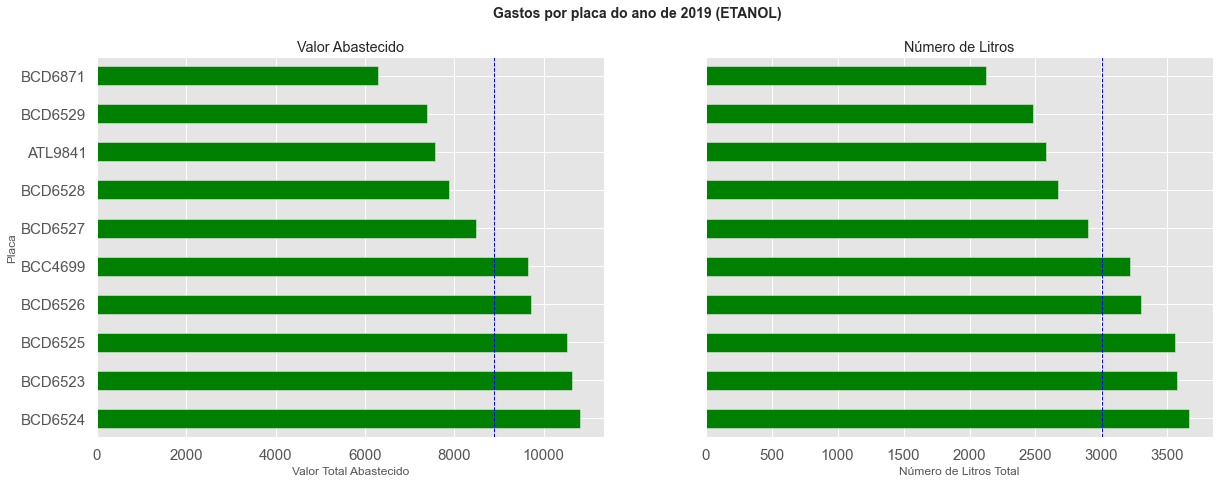

In [70]:
#get the figure and the axes
top_10 = df[df["Produto"] == "ETANOL"]

#plot data GASOLINA
top_10 = (top_10.groupby('Placa')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'sum', 'Nr Litros': 'sum'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10.rename(columns={'Placa': 'Placa', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, sharey=True, figsize=(20, 7))
top_10.plot(kind='barh', y="Valor Abastecido", x="Placa", ax=ax0, color='green')
ax0.set(title='Valor Abastecido', xlabel='Valor Total Abastecido', ylabel='Placa')

#plot the average as a vertical line
avg = top_10['Valor Abastecido'].mean()
ax0.axvline(x=avg, color='b', label='Média', linestyle='--', linewidth=1)

#repeat for the Nr Litros plot
top_10.plot(kind='barh', y="Número de Litros", x="Placa", ax=ax1, color='green')
avg = top_10['Número de Litros'].mean()
ax1.set(title='Número de Litros', xlabel='Número de Litros Total', ylabel='')
ax1.axvline(x=avg, color='b', label='Média', linestyle='--', linewidth=1)

#title the figure
fig.suptitle('Gastos por placa do ano de 2019 (ETANOL)', fontsize=14, fontweight='bold')

#hide the legend
ax1.legend().set_visible(False)
ax0.legend().set_visible(False)

C:\Users\Lucas Menossi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


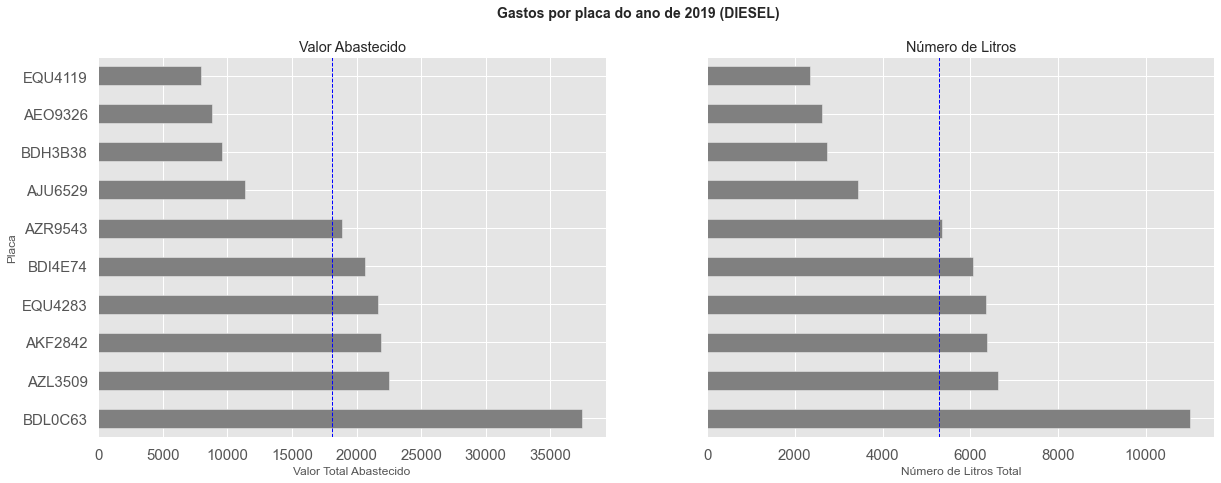

In [71]:
#get the figure and the axes
top_10 = df[df["Produto"] == "DIESEL"]

#plot data GASOLINA
top_10 = (top_10.groupby('Placa')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'sum', 'Nr Litros': 'sum'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10.rename(columns={'Placa': 'Placa', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, sharey=True, figsize=(20, 7))
top_10.plot(kind='barh', y="Valor Abastecido", x="Placa", ax=ax0, color='grey')
ax0.set(title='Valor Abastecido', xlabel='Valor Total Abastecido', ylabel='Placa')

#plot the average as a vertical line
avg = top_10['Valor Abastecido'].mean()
ax0.axvline(x=avg, color='b', label='Média', linestyle='--', linewidth=1)

#repeat for the Nr Litros plot
top_10.plot(kind='barh', y="Número de Litros", x="Placa", ax=ax1, color='grey')
avg = top_10['Número de Litros'].mean()
ax1.set(title='Número de Litros', xlabel='Número de Litros Total', ylabel='')
ax1.axvline(x=avg, color='b', label='Média', linestyle='--', linewidth=1)

#title the figure
fig.suptitle('Gastos por placa do ano de 2019 (DIESEL)', fontsize=14, fontweight='bold')

#hide the legend
ax1.legend().set_visible(False)
ax0.legend().set_visible(False)

C:\Users\Lucas Menossi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


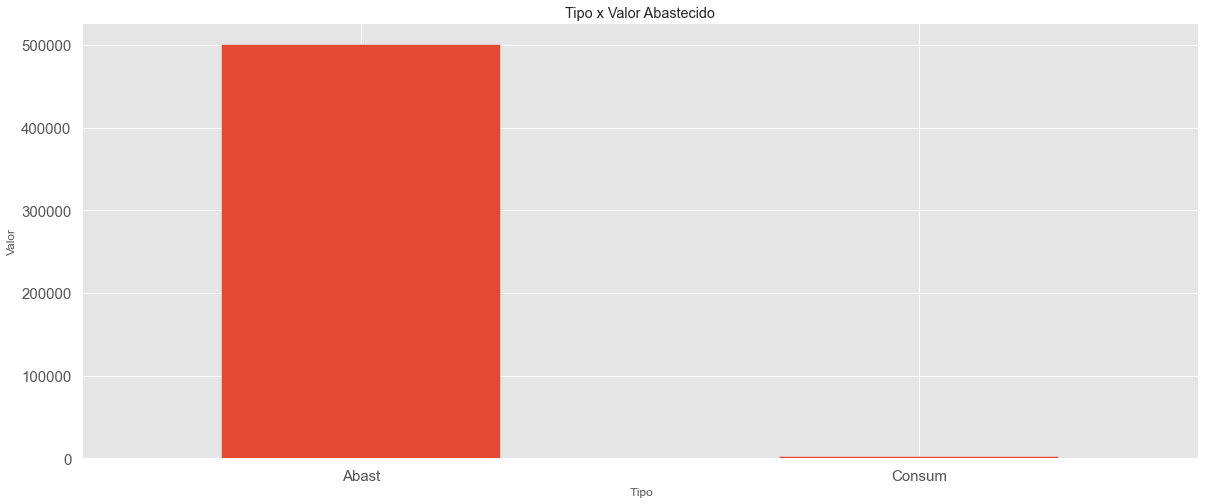

In [72]:
#set ggplot style
plt.style.use('ggplot')

#plot data
top_10 = (df.groupby('Tipo')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'sum', 'Nr Litros': 'sum'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10.rename(columns={'Tipo': 'Tipo', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

#create the figure and the axes
fig, ax = plt.subplots()

#plot the data and get the average
top_10.plot(kind='bar', y = "Valor Abastecido", x ="Tipo", rot = 0, ax=ax)
avg = top_10['Valor Abastecido'].mean()

#set limits and labels
ax.set(title='Tipo x Valor Abastecido', xlabel=' Tipo', ylabel='Valor')

#hide the legend
ax.legend().set_visible(False)

C:\Users\Lucas Menossi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


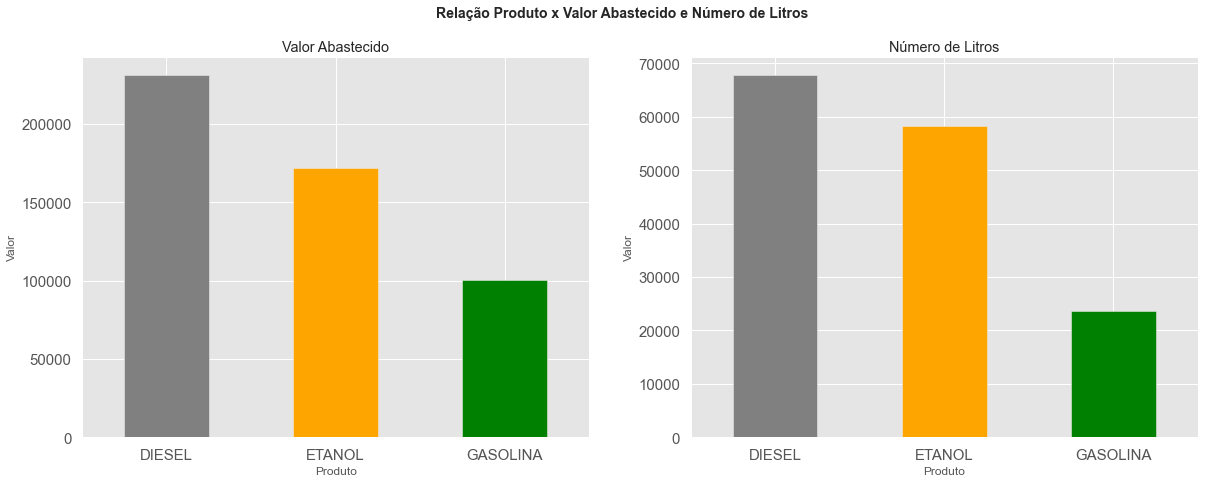

In [73]:
#set ggplot style
plt.style.use('ggplot')

#plot data
top_10 = (df.groupby('Produto')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'sum', 'Nr Litros': 'sum'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10.rename(columns={'Produto': 'Produto', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

#create the figure and the axes
fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, sharey=False, figsize=(20, 7))

#plot the data and get the average
top_10.plot(kind='bar', y = "Valor Abastecido", x ="Produto", rot = 0, ax=ax0, color=['grey', 'orange', 'green'])
#set limits and labels
ax0.set(title='Valor Abastecido', xlabel='Produto', ylabel='Valor')

#plot the data and get the average
top_10.plot(kind='bar', y = "Número de Litros", x ="Produto", rot = 0, ax=ax1, color=['grey', 'orange', 'green'])
#set limits and labels
ax1.set(title='Número de Litros', xlabel='Produto', ylabel='Valor')

#title the figure
fig.suptitle('Relação Produto x Valor Abastecido e Número de Litros', fontsize=14, fontweight='bold')

#hide the legend
ax0.legend().set_visible(False)
ax1.legend().set_visible(False)

C:\Users\Lucas Menossi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


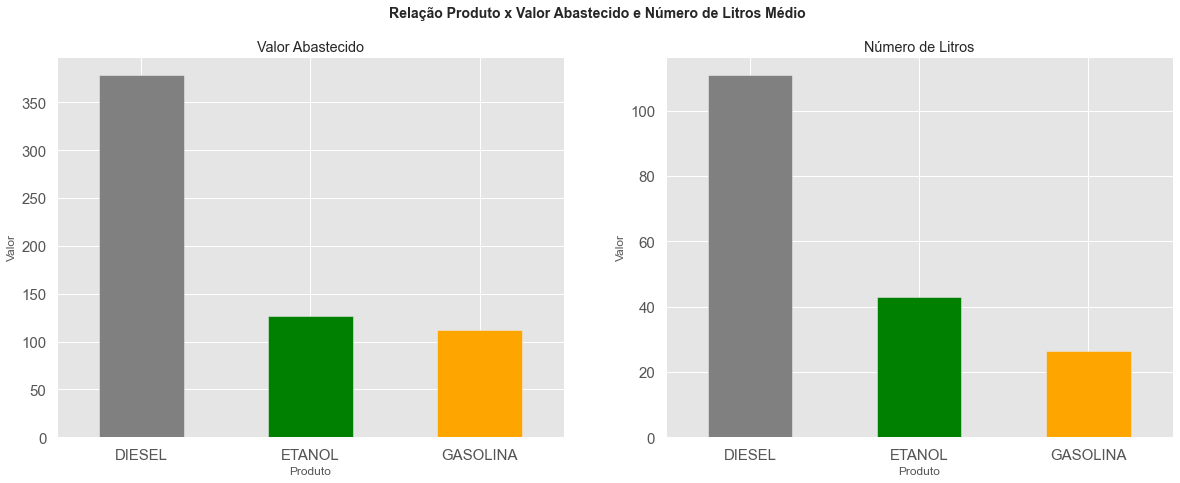

In [74]:
#set ggplot style
plt.style.use('ggplot')

#plot data
top_10 = (df.groupby('Produto')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'mean', 'Nr Litros': 'mean'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10.rename(columns={'Produto': 'Produto', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

#create the figure and the axes
fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, sharey=False, figsize=(20, 7))

#plot the data and get the average
top_10.plot(kind='bar', y = "Valor Abastecido", x ="Produto", rot = 0, ax=ax0, color=['grey', 'green', 'orange'])
#set limits and labels
ax0.set(title='Valor Abastecido', xlabel='Produto', ylabel='Valor')

#plot the data and get the average
top_10.plot(kind='bar', y = "Número de Litros", x ="Produto", rot = 0, ax=ax1, color=['grey', 'green', 'orange'])
#set limits and labels
ax1.set(title='Número de Litros', xlabel='Produto', ylabel='Valor')

#title the figure
fig.suptitle('Relação Produto x Valor Abastecido e Número de Litros Médio', fontsize=14, fontweight='bold')

#hide the legend
ax0.legend().set_visible(False)
ax1.legend().set_visible(False)

C:\Users\Lucas Menossi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


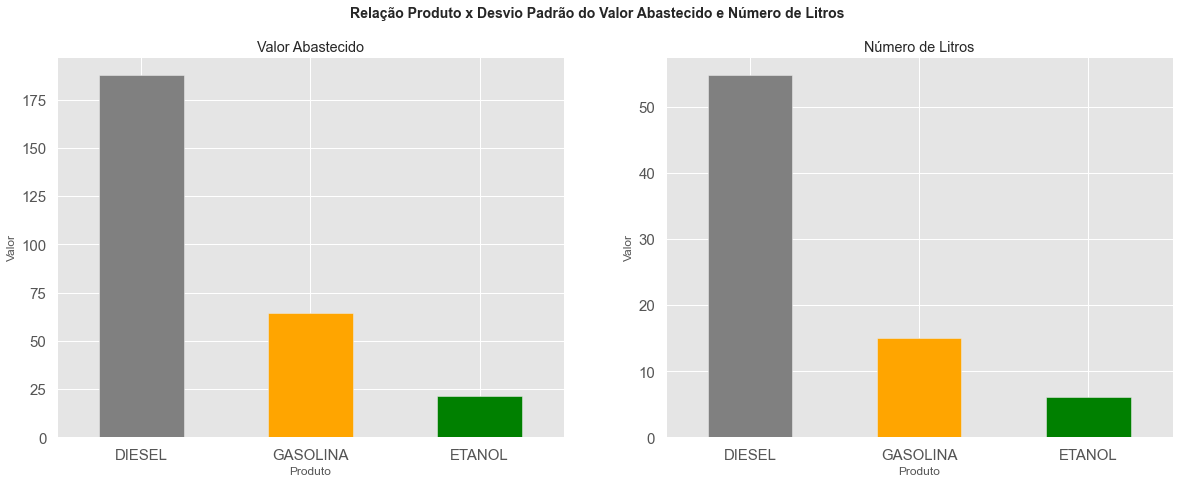

In [75]:
#set ggplot style
plt.style.use('ggplot')

#plot data
top_10 = (df.groupby('Produto')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'std', 'Nr Litros': 'std'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10.rename(columns={'Produto': 'Produto', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

#create the figure and the axes
fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, sharey=False, figsize=(20, 7))

#plot the data and get the average
top_10.plot(kind='bar', y = "Valor Abastecido", x ="Produto", rot = 0, ax=ax0, color=['grey', 'orange', 'green'])
#set limits and labels
ax0.set(title='Valor Abastecido', xlabel='Produto', ylabel='Valor')

#plot the data and get the average
top_10.plot(kind='bar', y = "Número de Litros", x ="Produto", rot = 0, ax=ax1, color=['grey', 'orange', 'green'])
#set limits and labels
ax1.set(title='Número de Litros', xlabel='Produto', ylabel='Valor')

#title the figure
fig.suptitle('Relação Produto x Desvio Padrão do Valor Abastecido e Número de Litros', fontsize=14, fontweight='bold')

#hide the legend
ax0.legend().set_visible(False)
ax1.legend().set_visible(False)